# DATA LINKS

Questions to answer and their corresponding data sets:

**HEALTH**

**1. Does eating organic food have any health benefits over conventional(non-organic) food? More nutritious/antioxidants? Prevent disease? Less exposure to anti-biotic resistent bacteria?**

* Milk fatty acid ratios: [https://onlinelibrary.wiley.com/doi/full/10.1002/fsn3.610](https://onlinelibrary.wiley.com/doi/full/10.1002/fsn3.610)

* (Limited) Flavonoids and antioxidant counts: [https://www.cambridge.org/core/journals/british-journal-of-nutrition/article/higher-antioxidant-and-lower-cadmium-concentrations-and-lower-incidence-of-pesticide-residues-in-organically-grown-crops-a-systematic-literature-review-and-metaanalyses/33F09637EAE6C4ED119E0C4BFFE2D5B1/core-reader](https://www.cambridge.org/core/journals/british-journal-of-nutrition/article/higher-antioxidant-and-lower-cadmium-concentrations-and-lower-incidence-of-pesticide-residues-in-organically-grown-crops-a-systematic-literature-review-and-metaanalyses/33F09637EAE6C4ED119E0C4BFFE2D5B1/core-reader)

* Deaths from strengthened bacteria: [https://www.cdc.gov/drugresistance/threat-report-2013/pdf/ar-threats-2013-508.pdf](https://www.cdc.gov/drugresistance/threat-report-2013/pdf/ar-threats-2013-508.pdf)

* https://www.organicfacts.net/organic-products/organic-food/health-benefits-of-organic-food.html -> covers tomatoes, milk, etc
    - tomatoes [https://pubs.acs.org/doi/pdf/10.1021/jf0346861] 
* http://www.orac-info-portal.de/download/ORAC_R2.pdf -> antioxdant related stuff (pdf)
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2841576/ -> large pdf at bottom for antoxidant stuff


**2. Is the amount of pesticides/fertilizer/antibiotics used on conventional food harmful to us?** 

* Pesticide poisonings non-occupational - [https://depts.washington.edu/ceeh/downloads/FF_Pesticides.pdf](https://depts.washington.edu/ceeh/downloads/FF_Pesticides.pdf)

**3. Which types of food products (fruits, vegetables, pultry, dairy, etc) have the most/least pesticides/fertilizer/antibiotic-resistent bacteria?** 

* Pesticide concentration in various produce: [https://apps.ams.usda.gov/pdp](https://apps.ams.usda.gov/pdp).
    - Chose all commodities, all pesticides, and any year when generating the csv file (smmary of findings, pos detects)
    
**COST**

**6. How do the prices of organic food compare to prices of conventional food (latest data)?**

* Price of organic versus conventional produce: [https://www.consumerreports.org/cro/news/2015/03/cost-of-organic-food/index.htm#table1](https://www.consumerreports.org/cro/news/2015/03/cost-of-organic-food/index.htm#table1).
    - Per serving size (pound, pint, oz, etc) 
    - Prices averaged from 8 select U.S. grocers

* 2013 prices for conventional (more data exists for dairy and such): [https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/)

* Some organic prices over time (nothing very recent): [https://www.ers.usda.gov/data-products/organic-prices/](https://www.ers.usda.gov/data-products/organic-prices/)

* Probably incldues organic food: https://www.bls.gov/opub/btn/volume-2/average-food-prices-a-snapshot-of-how-much-has-changed-over-a-century.htm

**SUSTAINABILITY**

**7. Is organic farming better for the environment versus conventional? (think water supply, global warming (gases), soil, etc)**


* Organic Farming Environmental Impact - [https://www.sciencedirect.com/science/article/pii/S0301479712004264](https://www.sciencedirect.com/science/article/pii/S0301479712004264)

* Organic food less yield -> worse for environment - [https://geneticliteracyproject.org/2018/02/16/usda-data-confirm-organic-yields-dramatically-lower-conventional-farming/](https://geneticliteracyproject.org/2018/02/16/usda-data-confirm-organic-yields-dramatically-lower-conventional-farming/)

* More analysis of crop yields - [https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0161673](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0161673)

* Report on environmental impact of organic foods - [https://rodaleinstitute.org/wp-content/uploads/fst-30-year-report.pdf](https://rodaleinstitute.org/wp-content/uploads/fst-30-year-report.pdf)

* Report citing pesticides and fertilizers as major player in pollinator decline [https://www.sciencedirect.com/science/article/pii/S0006320718313636#t0005](https://www.sciencedirect.com/science/article/pii/S0006320718313636#t0005)

**Additional Links**

* Our World In Data links
    [https://ourworldindata.org/is-organic-agriculture-better-for-the-environment](https://ourworldindata.org/is-organic-agriculture-better-for-the-environment) ;
    [https://ourworldindata.org/yields-and-land-use-in-agriculture](https://ourworldindata.org/yields-and-land-use-in-agriculture) ;
    [https://ourworldindata.org/fertilizer-and-pesticides](https://ourworldindata.org/fertilizer-and-pesticides)

* Biodiversity database [http://livingplanetindex.org/home/index](http://livingplanetindex.org/home/index)

* Another good website about food prices (but can’t access data) [https://www.ers.usda.gov/amber-waves/2016/may/investigating-retail-price-premiums-for-organic-foods/](https://www.ers.usda.gov/amber-waves/2016/may/investigating-retail-price-premiums-for-organic-foods/)

* Even more graphs [https://www.ers.usda.gov/data-products/charts-of-note/charts-of-note/?topicId=14904](https://www.ers.usda.gov/data-products/charts-of-note/charts-of-note/?topicId=14904)

**Questions Left Behind**

**4. Where are pesticide/fertilizer/antibiotic-resistent bacteria related poisonings/cases most common in the US?** 

* Antibiotic resistance by state per year: [https://wwwn.cdc.gov/narmsnow/](https://wwwn.cdc.gov/narmsnow/)

* Occupational pesticide poisonings be state by year: [https://www.cdc.gov/niosh/topics/pesticides/animatedmap.html](https://www.cdc.gov/niosh/topics/pesticides/animatedmap.html)

**5. Is it possible for everyone in the US to eat organic (i.e. produce enough organic foods)?**

* Organic Sustainability long term: [https://www.theguardian.com/sustainable-business/2016/aug/14/organic-farming-agriculture-world-hunger](https://www.theguardian.com/sustainable-business/2016/aug/14/organic-farming-agriculture-world-hunger)

* Predicted U.S. population growth by year: [https://www.census.gov/data/tables/2017/demo/popproj/2017-summary-tables.html](https://www.census.gov/data/tables/2017/demo/popproj/2017-summary-tables.html)

**8. Does organic food actually taste better? Qualitative data**

* Various qualitative plots about organic food consumption [https://www.pewresearch.org/science/2016/12/01/americans-views-about-and-consumption-of-organic-foods/](https://www.pewresearch.org/science/2016/12/01/americans-views-about-and-consumption-of-organic-foods/)

* Organic label tasting bias [https://www.theatlantic.com/health/archive/2013/04/study-organic-labels-make-food-taste-healthier/274683/](https://www.theatlantic.com/health/archive/2013/04/study-organic-labels-make-food-taste-healthier/274683/)

* Summarizing tasting surveys [https://medium.com/the-nature-of-food/does-organic-food-taste-better-dd5e2b2e166d](https://medium.com/the-nature-of-food/does-organic-food-taste-better-dd5e2b2e166d)


**9. What does being “organic” mean across different types of food products?**

* USDA defined rules for "organic" [https://www.ams.usda.gov/rules-regulations/organic](https://www.ams.usda.gov/rules-regulations/organic)


# CODE

Here is the general format for each dataset in each questions section:
    - Data Wrangling
        - State anything involved with extrating and cleaning the data + say why certain varibles are being created and why some data is being left out
    - Data Plotting 
        - Plot the data from variables generated during data wrangling
    - Data Analysis
        - Discuss the outcomes of the data nd how it answers the question(s) being asked about section
        
ALSO, may move all the code to Python file functions so that everything is a lot more clean and directed (like a research presentation) -> Maybe chek out the Titanic examplke again as a project guideline for everything

SCOPE: We should hpe to have a graph or two for every question minimally.

**NOTE: We used Adobe Acrobat's "PDF to Excel" converter to transform pdf data to Excel that we could then access.** 

# HEALTH

## 1. Does eating organic food have any health benefits over conventional (non-organic) food? 

One of this biggest factors contributing to the rise of organic food consumption over conventional food is the belief that organic food is healthier than conventional food. In order to shed some light on this issue, this section examines whether organic food provides various health benefits over conventional food. These benefits include increased fatty acid ratios, increased flavonoid and antioxidant counts, and less exposure to antibiotic resistant bacteria. Through presentation of data related to these topics, we can quantitatively analyze the postive impact organic food does, or does not, have on our health in comparison to conventional food. 

### 1.1 - Fatty Acid Ratios in Organic and Conventionally produced Milk

We first take a look at data which measures the ratios for various important fatty acids in both organic and conventional milk. 

#### Data Wrangling

To start, we import various Python libraries needed for the work done below. 

In [328]:
# Import necessary libraries 
import xlrd
import agate
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next, we store the Excel file for the milk data in a local variable. Here, we have already combed through the Excel file to make sure the cells for the data we are going to access are preserved well after being converted from PDF to Excel. Typical  errors that we fix include joined cells of data (separated out) and additional rows of data from parsing text spacing incorrectly (deleted).

In [74]:
# Imports the xlsx file and verifies it is the correct data with title and number of sheets
path_to_milk_data = os.path.join('Data', '1', 'Milk', 'Benbrook_et_al-2018-Food_Science_&_Nutrition.xlsx')

workbook = xlrd.open_workbook(path_to_milk_data)
sheet = workbook.sheets()[0]

C:\ANACONDA\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
C:\ANACONDA\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
C:\ANACONDA\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.


Now we begin to wrangle the data into dataframes which we can then graph during the data visualization step. 

We grab the sheet row values for the range in which the desired table is pictured. 

In [75]:
data_rows = [sheet.row_values(r) for r in range(157, 178)]
# cleaned_rows = np.array(len(data_rows))

After that, we clean the rows of any unnecessary space characters, as well as unwanted rows. The two unwanted rows here are deleted because their values are too small to show on the graphs below. We separate out the various types of data from the rows into separate arrays so they can be easily accessed from graphing. 

In [76]:
cleaned_rows = []
counter = 0
for row in data_rows:
    new_row = []
    for item in row:
        if item == '':
            continue
        new_row.append(item)
        if len(new_row) == 3:
            break
    counter += 1
    cleaned_rows.append(new_row)

titles = []
conventional = []
organic = []
# print(cleaned_rows)

for row in cleaned_rows:
    if len(row) > 1 and row[0] != '20:5 eicosapentae-        0.0025 noic, EPA' and row[0] != '22:5 docosapentae-       0.0037':
        titles.append(row[0])
        conventional.append(float(row[1]))
        organic.append(float(row[2]))
    else:
#         conventional.append(0.0)
#         organic.append(0.0)
        continue

Additional separation of values is done so that the dataframes needed for graphing can be successfully formed.  

In [77]:
# df_data = {'Title': [],
#            'Conventional': [],
#            'Organic': []}

# for value in row_data:
#     if len(value) == 0:
#         df_data['Conventional'].append('NaN')
#         df_data['Organic'].append('NaN')
#         continue
#     df_data['Conventional'].append(float(value[0]))
#     df_data['Organic'].append(float(value[1]))



# for value in row_titles:
#     df_data['Title'].append(value)

# # df_data    
    
# dfMilk = pd.DataFrame(df_data)
# finalDfMilk = dfMilk.set_index('Title')
# finalDfMilk

# conventional.append(float(0.0025))
# conventional.append(float(0.0033))

# organic.append(float(0.0037))
# organic.append(float(0.0044))

# titles.append('20:5 eicosapentae-noic, EPA')
# titles.append('22:5 docosapentae-noic, DPA')

conventionalIndiv = []
organicIndiv = []
titlesIndiv = []
conventionalTotal = []
organicTotal = []
titlesTotal = []
conventionalRatio = []
organicRatio = []
titlesRatio = []

for index, name in enumerate(titles):
    if 'Total' in name or 'acids' in name:
        titlesTotal.append(name)
        conventionalTotal.append(conventional[index])
        organicTotal.append(organic[index])
    elif '/' in name:
        titlesRatio.append(name)
        conventionalRatio.append(conventional[index])
        organicRatio.append(organic[index])
    else:
        titlesIndiv.append(name)
        conventionalIndiv.append(conventional[index])
        organicIndiv.append(organic[index])

dfIndiv = pd.DataFrame({'Conventional': conventionalIndiv,
                   'Organic': organicIndiv}, index=titlesIndiv)

dfTotal = pd.DataFrame({'Conventional': conventionalTotal,
                   'Organic': organicTotal}, index=titlesTotal)

dfRatio = pd.DataFrame({'Conventional': conventionalRatio,
                   'Organic': organicRatio}, index=titlesRatio)

dfIndiv = dfIndiv.sort_values('Conventional', ascending=False)
dfTotal = dfTotal.sort_values('Conventional', ascending=False)
dfRatio = dfRatio.sort_values('Conventional', ascending=False)

# delete the individuals, focus on the big picture

#### Data Visualization

Now that we have the data frames we need, we can plot the data with several bar gaphs.

The first graph below compares the fatty acid content in organic and conventional milk for individual types of fatty acids. The results are measured using grames of fatty acid per 100 grams of milk. 

Text(0.5, 1.0, 'Individual Fatty Acids in whole milk - Conventional v.s. Organic')

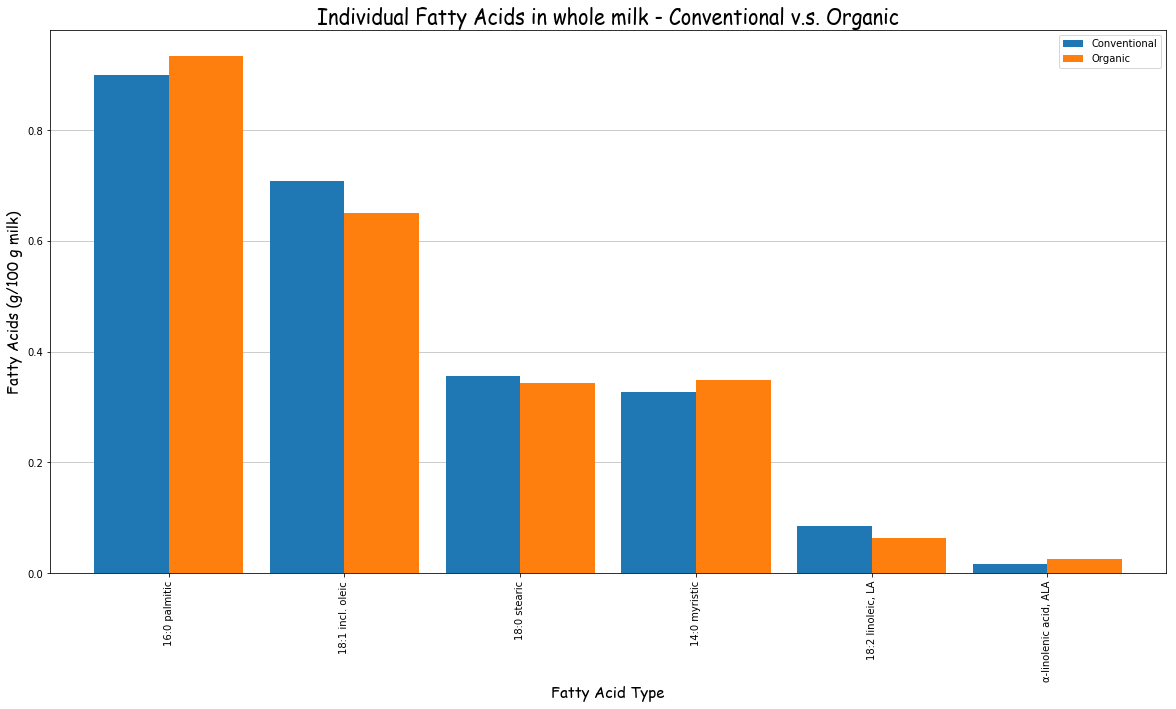

In [78]:
fig, ax = plt.subplots()
dfIndiv.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3) 
ax.set_xlabel("Fatty Acid Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Fatty Acids (g/100 g milk)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Individual Fatty Acids in whole milk - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

From left to right:

- 16:0 palmitic -> Saturated fatty acid with 16-carbon backbone
- 18:1 incl. oleic -> Monosaturated omega-9 with lipid number (carbon count) of 18:1 cis-9
- 18:0 stearic -> Saturated fatty acid with 18-carbon backbone
- 14:0 myristic -> Saturated fatty acid with 14 carbon backbone
- 18:2 linoleic, LA -> omega-6 fatty acid with lipid number of 18:2
- a-linolenic acid, ALA -> omega-3 fatty acid

The second graph shows the totals across all fatty acid groups.

Text(0.5, 1.0, 'Total Fatty Acids in whole milk - Conventional v.s. Organic')

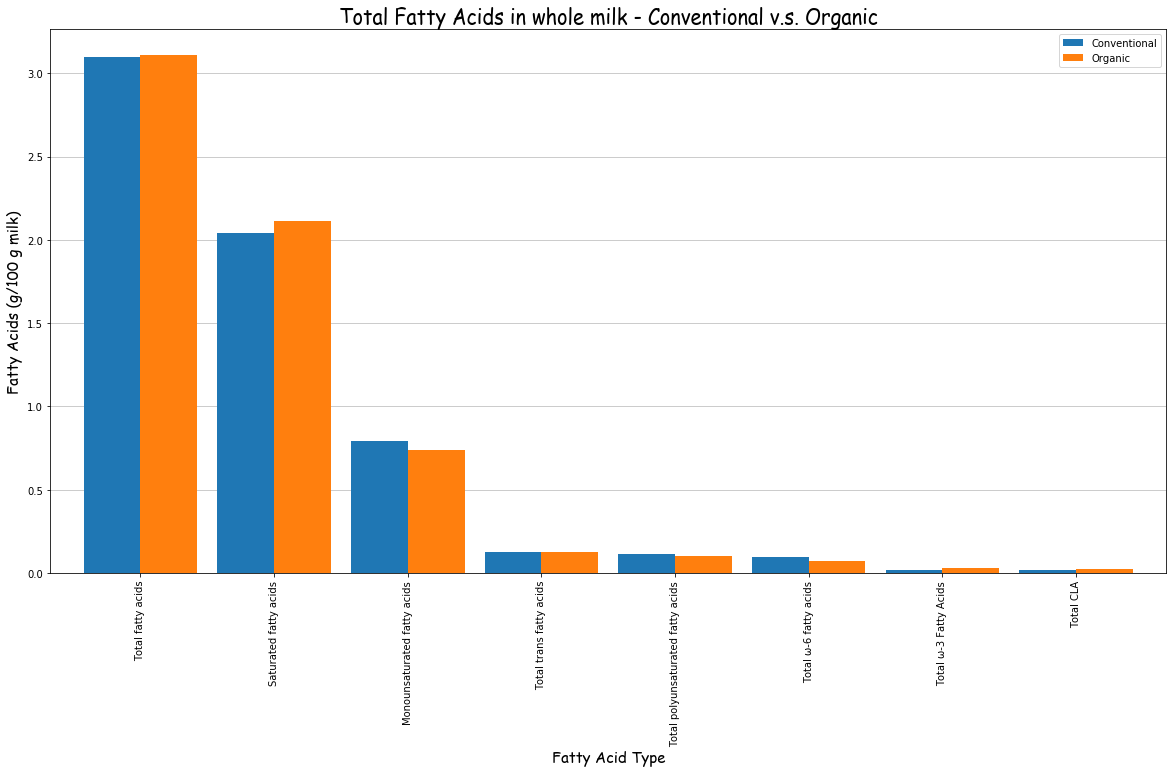

In [79]:
fig, ax = plt.subplots()
dfTotal.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3) 
ax.set_xlabel("Fatty Acid Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Fatty Acids (g/100 g milk)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Total Fatty Acids in whole milk - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

The third graph show the ratios of important fatty acid groups. 

Text(0.5, 1.0, 'Ratios of Fatty Acids in whole milk - Conventional v.s. Organic')

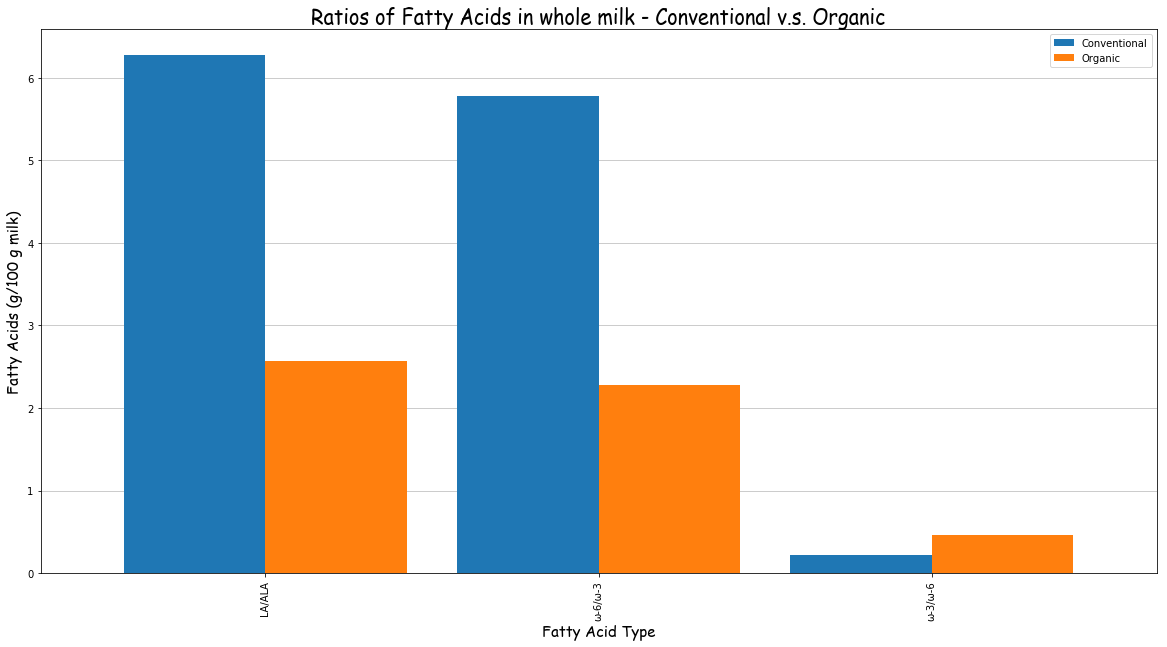

In [80]:
fig, ax = plt.subplots()
dfRatio.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3) 
ax.set_xlabel("Fatty Acid Type", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Fatty Acids (g/100 g milk)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Ratios of Fatty Acids in whole milk - Conventional v.s. Organic', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

We now discuss the results of the data to determine whether organic or conventional milk contains more or less fatty acids. (etc)

Essential Fatty Acids (EFAs) in general are essential nutrients that play a large role in keeping our cells healthy and avoid chronic, life-threatening diseases (see https://www.tandfonline.com/doi/full/10.1080/19390210902861841). We cannot create EFAs in the body ourselves, so we must intake them from the foods we eat. Therefore, it is important that the food we eat is not lacking in levels of these fatty acids. 

Some of the more critical fatty acids in terms of their impact on our health are omega-3 (w-3) and omega-6 (w-6) fatty acids. It is crucial that we keep a balanced ratio between ingesting w-3 and w-6 acids, as an increased w-6 / w-3 ratio has been shown to cause cellular structure deformation that can lead to loss of function and disease. It is clear from chart 3 above that the ratio of w-6 to w-3 acids is much worse in conventional food versus organic food. Let us examine exactly how much more below:

In [81]:
omega6v3Conv = conventionalRatio[1]   
omega6v3Org = organicRatio[1]

ratio = omega6v3Conv / omega6v3Org
print("Conventional produce on average has a omega-6 / omega-3 ratio that is " + (str(ratio)) + " times the omega-6 / omega-3 ratio found on average in Organic produce!")

Conventional produce on average has a omega-6 / omega-3 ratio that is 2.536906854130053 times the omega-6 / omega-3 ratio found on average in Organic produce!


Linoleic acid (LA) is an important w-6 acid, while a-lenolenic acid (ALA) is an important w-3 acid. Let's also examine the ratio of LA/ALA in conventional foodersus organic food:

In [82]:
omega6v3Conv = conventionalRatio[0]   
omega6v3Org = organicRatio[0]

ratio = omega6v3Conv / omega6v3Org
print("Conventional produce on average has a LA / ALA ratio that is " + (str(ratio)) + " times the LA / ALA ratio found on average in Organic produce!")

Conventional produce on average has a LA / ALA ratio that is 2.4423676012461057 times the LA / ALA ratio found on average in Organic produce!


Unfortunately, the data exhibited for the rest of the fatty acid content shows no trend towards preferring organic or conventional foods. As shown in particular by the total number of fatty acids for each type of food, there is not much change in value between either types. Additionally, these counts are only based on one professional study and for one type of food product containing fatty acids, so it is not fair to say that this data is representative for all types of Organic and Conventional produce. However, research has shown that the reason behind the higher w-6 / w-3 and LA / ALA ratios seen here is due to conventionally-based cows eating less nutritious foods in comparison to their organically-based counterparts, thus producing less nutritious milk. Therefore, we can make an educated assumption that other conventionally-based animals who help produce foods that are high in EFAs may encounter the same issue, making organic foods seem like the healthier option for this scenario. 

### 1.2 - Flavonoid and Antioxidant Counts

Data is a little hard to understand (and the importnat stuff is in a word document). May/may not include later.

#### Data Wrangling

#### Data Visualization

#### Data Analysis

### 1.3 - Deaths from Strengthened Bacteria

#### Data Wrangling

In [ ]:
# Another bar chart -> bacteria type versus number of deaths

#### Data Visualization

#### Data Analysis

### 1.4 - Tomatoes

#### Data Wrangling

#### Data Visualization

#### Data Analysis

## 2. Is the amount of substances (pesticides, fertilizer, antibiotics, etc) used on conventional food harmful to us?

### 2.1 - EPA Harm Levels

In [529]:
dfPesticide2013 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2013.csv'))
dfPesticide2014 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2014.csv'))
dfPesticide2015 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2015.csv'))
dfPesticide2016 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2016.csv'))
dfPesticide2017 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2017.csv'))

maxDet = []
pp = []
EPA = []
pesticideNames = []
commodity = []
numDetects = []

maxDet.append(dfPesticide2013['Max Detect'].values)
maxDet.append(dfPesticide2014['Max Detect'].values)
maxDet.append(dfPesticide2015['Max Detect'].values)
maxDet.append(dfPesticide2016['Max Detect'].values)
maxDet.append(dfPesticide2017['Max Detect'].values)

pp.append(dfPesticide2013['pp_'].values)
pp.append(dfPesticide2014['pp_'].values)
pp.append(dfPesticide2015['pp_'].values)
pp.append(dfPesticide2016['pp_'].values)
pp.append(dfPesticide2017['pp_'].values)

EPA.append(dfPesticide2013['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2014['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2015['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2016['EPA Tolerance (ppm)'].values)
EPA.append(dfPesticide2017['EPA Tolerance (ppm)'].values)

pesticideNames.append(dfPesticide2013['Pesticide Name'].values)
pesticideNames.append(dfPesticide2014['Pesticide Name'].values)
pesticideNames.append(dfPesticide2015['Pesticide Name'].values)
pesticideNames.append(dfPesticide2016['Pesticide Name'].values)
pesticideNames.append(dfPesticide2017['Pesticide Name'].values)

commodity.append(dfPesticide2013['Commodity'].values)
commodity.append(dfPesticide2014['Commodity'].values)
commodity.append(dfPesticide2015['Commodity'].values)
commodity.append(dfPesticide2016['Commodity'].values)
commodity.append(dfPesticide2017['Commodity'].values)

numDefects.append(dfPesticide2013['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2014['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2015['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2016['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2017['Number of Samples with Detects'].values)

In [530]:
count = 0
yearNum = 2012
posDets = 0
posDetsHarm = 0
posDetsDict = {}
posDetsDictHarm = {}
# types = []

for year in pesticideNames:
    yearNum += 1
    for index, name in enumerate(year):
        if float(numDefects[count][index]) > 0:
            key = name + ", " + commodity[count][index] + ", " + str(yearNum)
            posDetsDict[key] = maxDet[count][index] 
            posDets += 1
#             if EPA[count][index] not in types:
#                 types.append(EPA[count][index])
            if pp[count][index] == 'M' and str(EPA[count][index]) != 'nan':
                if EPA[count][index] == 'NT':
#                     print(maxDet[count][index])
                    if float(maxDet[count][index]) > 0:
                        posDetsDictHarm[key] = maxDet[count][index] 
                        posDetsHarm += 1
#                 elif EPA[count][index] is int:
#                     print('b: ' + EPA[count][index])
                elif 'AL' in EPA[count][index]:
                    EPA[count][index] = EPA[count][index].replace(' AL', '')
                    EPA[count][index] = float(EPA[count][index])
                    if float(maxDet[count][index]) > EPA[count][index]:
                        posDetsDictHarm[key] = maxDet[count][index] 
                        posDetsHarm += 1
                elif '/' in EPA[count][index]:
                    num1 = ""
                    num2 = ""
                    idx = 0
                    length = len(EPA[count][index])
                    while EPA[count][index][idx] != '/':
                        num1 = num1 + EPA[count][index][idx]
                        idx += 1
                    idx += 1
                    while idx < length:
                        num2 = num2 + EPA[count][index][idx]
                        idx += 1
#                     print(num1 + " and " +  num2)
                    total = float(num1) / float(num2)
#                     print(total)
                    if float(maxDet[count][index]) > total:
                        posDetsDictHarm[key] = maxDet[count][index] 
                        posDetsHarm += 1
#                     print(EPA[count][index])
                elif 'EX' != EPA[count][index]:
                    if 'EX3' != EPA[count][index]:
#                         print(EPA[count][index])
                        d = float(EPA[count][index])
                        if float(maxDet[count][index]) > d:
                            posDetsDictHarm[key] = maxDet[count][index] 
                            posDetsHarm += 1
    
                        
            
    count += 1

In [474]:
#nan, NT, 0.03 AL, EX, EX3

In [531]:
posDets

3555

In [532]:
posDetsHarm

473

In [535]:
percentage = posDetsHarm/posDets

print("The total number of items with positive detections is " + str(posDets))
print("Out of those items, the total number of harmful positive detections is " + str(posDetsHarm))
print("Thus, the total percentage of items with harmful positive detections is " + str(percentage) + "%")

The total number of items with positive detections is 3555
Out of those items, the total number of harmful positive detections is 473
Thus, the total percentage of items with harmful positive detections is 0.13305203938115331%


### 2.2

In [ ]:
# TO-DO

## 3. Which types of food products (fruits, vegetables, poultry, dairy, etc) have the most/least substances used on them in the U.S.? (Pesticides, fertilizer, antibiotics, etc)

### 3.1 - Pesticide Detection in Various Produce over Time

#### Data Wrangling

In [84]:
# Gathers the data for produce samples with defects for several years (stores in dataframe)
dfPesticide2013 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2013.csv'), usecols=['Number of Samples with Detects'])
dfPesticide2014 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2014.csv'), usecols=['Number of Samples with Detects'])
dfPesticide2015 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2015.csv'), usecols=['Number of Samples with Detects'])
dfPesticide2016 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2016.csv'), usecols=['Number of Samples with Detects'])
dfPesticide2017 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2017.csv'), usecols=['Number of Samples with Detects'])

pesticideValues = []

# Appends the total number of defects per year into an array (index maps to a new year). 
# This data is later plotted on the line graph with appropriate labeling
pesticideValues.append(np.sum(dfPesticide2013['Number of Samples with Detects'].values))
pesticideValues.append(np.sum(dfPesticide2014['Number of Samples with Detects'].values))
pesticideValues.append(np.sum(dfPesticide2015['Number of Samples with Detects'].values))
pesticideValues.append(np.sum(dfPesticide2016['Number of Samples with Detects'].values))
pesticideValues.append(np.sum(dfPesticide2017['Number of Samples with Detects'].values))

count = 3
for year in pesticideValues:
    print('201'+ str(count) + ": " + str(year) + ' detections')
    count += 1

2013: 18136 detections
2014: 22363 detections
2015: 38751 detections
2016: 31981 detections
2017: 12934 detections


#### Data Visualization

[Text(0, 0, '0'),
 Text(0, 0, '10000'),
 Text(0, 0, '20000'),
 Text(0, 0, '30000'),
 Text(0, 0, '40000')]

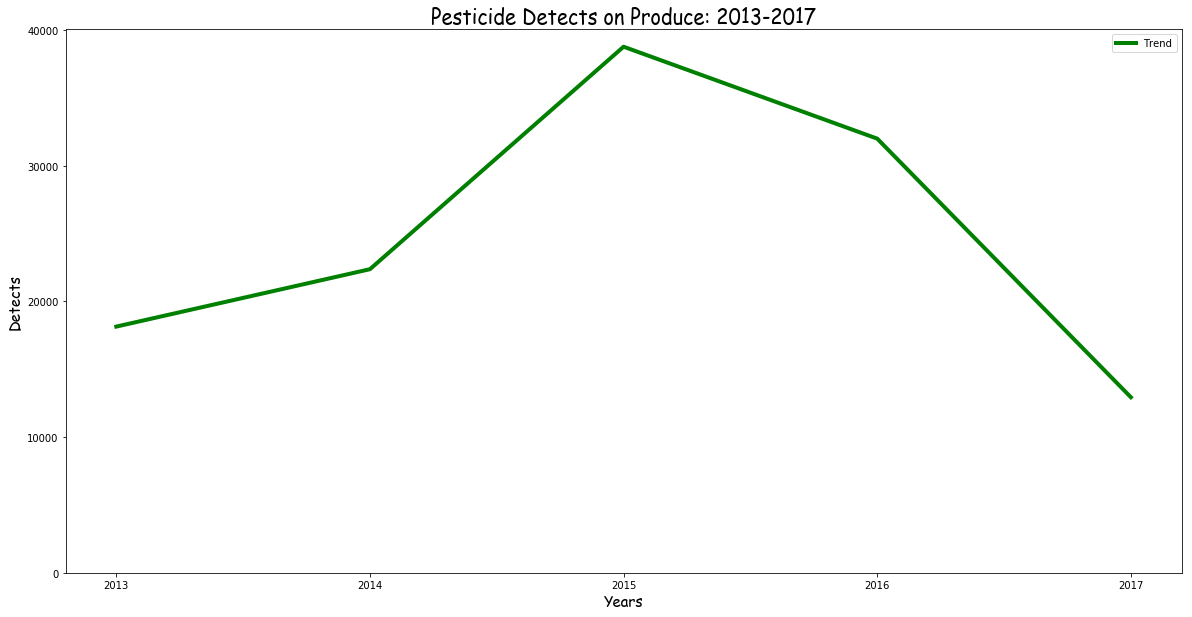

In [85]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(pesticideValues, 'g', label='Trend', linewidth=4)
ax.set_xlabel("Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Detects", fontname='Comic Sans MS', fontsize=15)
plt.title('Pesticide Detects on Produce: 2013-2017', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017'])
ax.set_yticks([0, 10000, 20000, 30000, 40000])
ax.set_yticklabels(['0', '10000', '20000', '30000', '40000'])

In [290]:
# Need to make the graph above a sliding graph?

#### Data Analysis

### 3.2 - Pecticide Detection in various produce: Top-10 Pesticides and Top-10 Crops (Individual and Cumulative Years)

#### Data Wrangling

In [400]:
dfPesticide2013 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2013.csv'))
dfPesticide2014 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2014.csv'))
dfPesticide2015 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2015.csv'))
dfPesticide2016 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2016.csv'))
dfPesticide2017 = pd.read_csv(os.path.join('Data', '3', 'Pesticide', 'SummaryOfFindings2017.csv'))
dfPesticide2013

,Pesticide Name,Commodity,Number of Samples Analyzed,Number of Samples with Detects,Pct of Samples with Detects,Min Detect,Max Detect,LOD Range,pp_,EPA Tolerance (ppm)
0,1-Naphthol,Apple Juice,379,0,,,,0.015,M,12
1,1-Naphthol,Baby Food - Peas,378,0,,,,0.01,M,10
2,1-Naphthol,Carrots,712,0,,,,0.017 - 0.057,M,2.0
3,1-Naphthol,Green Beans,347,0,,,,0.06,M,10
4,1-Naphthol,Mushrooms,503,0,,,,0.015,M,NT
5,1-Naphthol,Nectarines,543,4,0.7,0.025,2.0891,0.015,M,10
6,1-Naphthol,Summer Squash,346,0,,,,0.02,M,3.0
7,1-Naphthol,"Water, Finished",7,0,,,,30,T,NaN
8,1-Naphthol,"Water, Groundwater",12,0,,,,30,T,NaN
9,1-Naphthol,"Water, Untreated",7,0,,,,30,T,NaN


In [401]:
pesticideNames = []
commodity = []
numDefects = []
allThree2013 = []
allThree2014 = []
allThree2015 = []
allThree2016 = []
allThree2017 = []

pesticideNames.append(dfPesticide2013['Pesticide Name'].values)
pesticideNames.append(dfPesticide2014['Pesticide Name'].values)
pesticideNames.append(dfPesticide2015['Pesticide Name'].values)
pesticideNames.append(dfPesticide2016['Pesticide Name'].values)
pesticideNames.append(dfPesticide2017['Pesticide Name'].values)

commodity.append(dfPesticide2013['Commodity'].values)
commodity.append(dfPesticide2014['Commodity'].values)
commodity.append(dfPesticide2015['Commodity'].values)
commodity.append(dfPesticide2016['Commodity'].values)
commodity.append(dfPesticide2017['Commodity'].values)

numDefects.append(dfPesticide2013['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2014['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2015['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2016['Number of Samples with Detects'].values)
numDefects.append(dfPesticide2017['Number of Samples with Detects'].values)

# allThree2013.append((dfPesticide2013['Pesticide Name'].values, dfPesticide2013['Commodity'].values, dfPesticide2013['Number of Samples with Detects'].values))
# allThree2014.append((dfPesticide2014['Pesticide Name'].values, dfPesticide2014['Commodity'].values, dfPesticide2014['Number of Samples with Detects'].values))
# allThree2015.append((dfPesticide2015['Pesticide Name'].values, dfPesticide2015['Commodity'].values, dfPesticide2015['Number of Samples with Detects'].values))
# allThree2016.append((dfPesticide2016['Pesticide Name'].values, dfPesticide2016['Commodity'].values, dfPesticide2016['Number of Samples with Detects'].values))
# allThree2017.append((dfPesticide2017['Pesticide Name'].values, dfPesticide2017['Commodity'].values, dfPesticide2017['Number of Samples with Detects'].values))

In [439]:
# Find the Pesticide with the most detects (all years/for each year) -> do all years first (bar graph)

# Find the commodity with the most detects (all years/ for each year)

count = 0
yearNum = 2012
allThree = []
crops = {}
pesticides = {}


for year in pesticideNames:
    yearNum += 1
    for index, name in enumerate(year):
        allThree.append((name, commodity[count][index], float(numDefects[count][index]), str(yearNum))) #Pesticide Name, Commodity for current year and index, Defects for surrent year and index, year 
        if name in pesticides:
            pesticides[name] += float(numDefects[count][index])
        else:
            if float(numDefects[count][index]) > 0:
                pesticides[name] = float(numDefects[count][index])
        if commodity[count][index] in crops:
            crops[commodity[count][index]] += float(numDefects[count][index])
        else:
            if float(numDefects[count][index]) > 0:
                crops[commodity[count][index]] = float(numDefects[count][index])
    count += 1
# for year in pesticideNames:
#     allThree.append((year, commodity[count], numDefects[count]))
#     count += 1


# allThree
# pesticides
# print(crops)


        
# allThree2013.append()
# allThree2014.append()
# allThree2015.append()
# allThree2016.append()
# allThree2017.append()

# def sortByDefects(val): 
#     return val[2]  

allThreeSorted = allThree.sort(key=lambda tup:tup[2])  

allThree.sort(key=lambda tup:tup[2], reverse = True)  
# print(allThree)

# crops = crops.sort()
# print(crops)

top10Pesticides = {}
top10Crops = {}
top10PesticidesArr = []
top10CropsArr = []
top10PesticidesArrC = []
top10CropsArrC = []
bottom10PesticidesArrC = []
bottom10CropsArrC = []

top10PesticidesCumulative = {k: v for k, v in sorted(pesticides.items(), key=lambda x: x[1], reverse = True)}
top10CropsCumulative = {k: v for k, v in sorted(crops.items(), key=lambda x: x[1], reverse = True)}

bottom10PesticidesCumulative = {k: v for k, v in sorted(pesticides.items(), key=lambda x: x[1])}
bottom10CropsCumulative = {k: v for k, v in sorted(crops.items(), key=lambda x: x[1])}

for tup in allThree:
    if tup[0] not in top10Pesticides:
        top10Pesticides[tup[0]] = tup
        top10PesticidesArr.append(tup)
    if len(top10Pesticides) == 10:
        break
        
for tup in allThree:
    if tup[1] not in top10Crops:
        top10Crops[tup[1]] = tup
        top10CropsArr.append(tup)
    if len(top10Crops) == 10:
        break
        
for val in top10PesticidesCumulative:
    top10PesticidesArrC.append((val, top10PesticidesCumulative[val]))
    if len(top10PesticidesArrC) == 10:
        break
        
for val in top10CropsCumulative:
    top10CropsArrC.append((val, top10CropsCumulative[val]))
    if len(top10CropsArrC) == 10:
        break
        
for val in bottom10PesticidesCumulative:
    bottom10PesticidesArrC.append((val, bottom10PesticidesCumulative[val]))
    if len(bottom10PesticidesArrC) == 10:
        break
        
for val in bottom10CropsCumulative:
    bottom10CropsArrC.append((val, bottom10CropsCumulative[val]))
    if len(bottom10CropsArrC) == 10:
        break

In [427]:
top10Pesticides

{'Chlorpropham': ('Chlorpropham', 'Potatoes', 705.0, '2016'),
 'Imazalil': ('Imazalil', 'Oranges', 591.0, '2016'),
 'Diphenylamine (DPA)': ('Diphenylamine (DPA)', 'Apples', 582.0, '2015'),
 'Thiabendazole': ('Thiabendazole', 'Oranges', 536.0, '2015'),
 "DDE p,p'": ("DDE p,p'", 'Butter', 503.0, '2013'),
 'Permethrin trans': ('Permethrin trans', 'Spinach', 503.0, '2015'),
 'Permethrin cis': ('Permethrin cis', 'Spinach', 500.0, '2015'),
 'Mandipropamid': ('Mandipropamid', 'Spinach', 482.0, '2015'),
 'Fludioxonil': ('Fludioxonil', 'Peaches', 453.0, '2014'),
 'Boscalid': ('Boscalid', 'Grapes', 450.0, '2015')}

In [432]:
top10PesticidesArrC

[('Boscalid', 5542.0),
 ('Thiabendazole', 5138.0),
 ('Fludioxonil', 5060.0),
 ('Pyraclostrobin', 4980.0),
 ('Imidacloprid', 4722.0),
 ('Azoxystrobin', 3975.0),
 ('Acetamiprid', 3802.0),
 ('Chlorantraniliprole', 3180.0),
 ('Pyrimethanil', 3067.0),
 ('Imazalil', 2656.0)]

In [440]:
bottom10PesticidesArrC

[('Chlorsulfuron', 1.0),
 ('Clomazone', 1.0),
 ('Dimethenamid ethanesulfonic acid (ESA)', 1.0),
 ('Indaziflam', 1.0),
 ('Sulfometuron methyl', 1.0),
 ('Cyproconazole', 1.0),
 ('Dichlobenil', 1.0),
 ('Dicofol Total', 1.0),
 ('Disulfoton sulfone', 1.0),
 ('Fluazinam', 1.0)]

In [90]:
top10Crops

{'Potatoes': ('Chlorpropham', 'Potatoes', 705.0, '2016'),
 'Oranges': ('Imazalil', 'Oranges', 591.0, '2016'),
 'Apples': ('Diphenylamine (DPA)', 'Apples', 582.0, '2015'),
 'Grapefruit': ('Imazalil', 'Grapefruit', 562.0, '2016'),
 'Butter': ("DDE p,p'", 'Butter', 503.0, '2013'),
 'Spinach': ('Permethrin trans', 'Spinach', 503.0, '2015'),
 'Peaches': ('Fludioxonil', 'Peaches', 453.0, '2014'),
 'Grapes': ('Boscalid', 'Grapes', 450.0, '2015'),
 'Apple Sauce': ('Acetamiprid', 'Apple Sauce', 440.0, '2017'),
 'Nectarines': ('Fludioxonil', 'Nectarines', 439.0, '2014')}

In [431]:
top10CropsArrC

[('Strawberries', 10949.0),
 ('Spinach', 10578.0),
 ('Nectarines', 7995.0),
 ('Grapes', 7010.0),
 ('Celery', 6208.0),
 ('Pears', 6174.0),
 ('Apples', 6065.0),
 ('Peaches', 5698.0),
 ('Tomatoes', 5481.0),
 ('Cherries, Frozen', 5093.0)]

In [442]:
bottom10CropsArrC

[('Sweet Corn, Frozen', 1.0),
 ('Oats', 1.0),
 ('Pineapple, Canned', 1.0),
 ('Eggs', 2.0),
 ('Peanut Butter', 3.0),
 ('Garbanzo Beans, Canned', 6.0),
 ('Infant Formula, Soy-based', 8.0),
 ('Sweet Corn, Fresh', 12.0),
 ('Fish, Salmon', 14.0),
 ('Milk', 31.0)]

In [443]:
# data2Perc = {#'Produce Item' : subTitles2Perc,
#         'Price Chopper' : priceChopperPerc,
#         'Safeway' : safewayPerc,
#         'Walmart' : walmartPerc,
#         'Whole Foods' : wholeFoodsPerc}

# Individual Top

pName = []
cName = []
pNumDet = []
cNumDet = []

for i in top10PesticidesArr:
    pName.append(i[0]+", "+i[3])
    pNumDet.append(i[2])
    
for i in top10CropsArr:
    cName.append(i[1]+", "+i[3])
    cNumDet.append(i[2])

pes = {'Number of Positive Detects' : pNumDet}

crop = {'Number of Positive Detects' : cNumDet}

# Cumulative Top

df1 = pd.DataFrame(pes, index = pName) 
df2 = pd.DataFrame(crop, index = cName)

pNameC = []
cNameC = []
pNumDetC= []
cNumDetC = []

for i in top10PesticidesArrC:
    pNameC.append(i[0])
    pNumDetC.append(i[1])
    
for i in top10CropsArrC:
    cNameC.append(i[0])
    cNumDetC.append(i[1])

pesC = {'Number of Positive Detects' : pNumDetC}

cropC = {'Number of Positive Detects' : cNumDetC}

# Cumulative Bottom

df1C = pd.DataFrame(pesC, index = pNameC) 
df2C = pd.DataFrame(cropC, index = cNameC)

pNameCb = []
cNameCb = []
pNumDetCb= []
cNumDetCb = []

for i in bottom10PesticidesArrC:
    pNameCb.append(i[0])
    pNumDetCb.append(i[1])
    
for i in bottom10CropsArrC:
    cNameCb.append(i[0])
    cNumDetCb.append(i[1])

pesCb = {'Number of Positive Detects' : pNumDetCb}

cropCb = {'Number of Positive Detects' : cNumDetCb}


df1Cb = pd.DataFrame(pesCb, index = pNameCb) 
df2Cb = pd.DataFrame(cropCb, index = cNameCb)

#### Data Visualization

Text(0.5, 1.0, 'Highest Number of Positive Detects by Pesticides for Individual Year: 2013-2017')

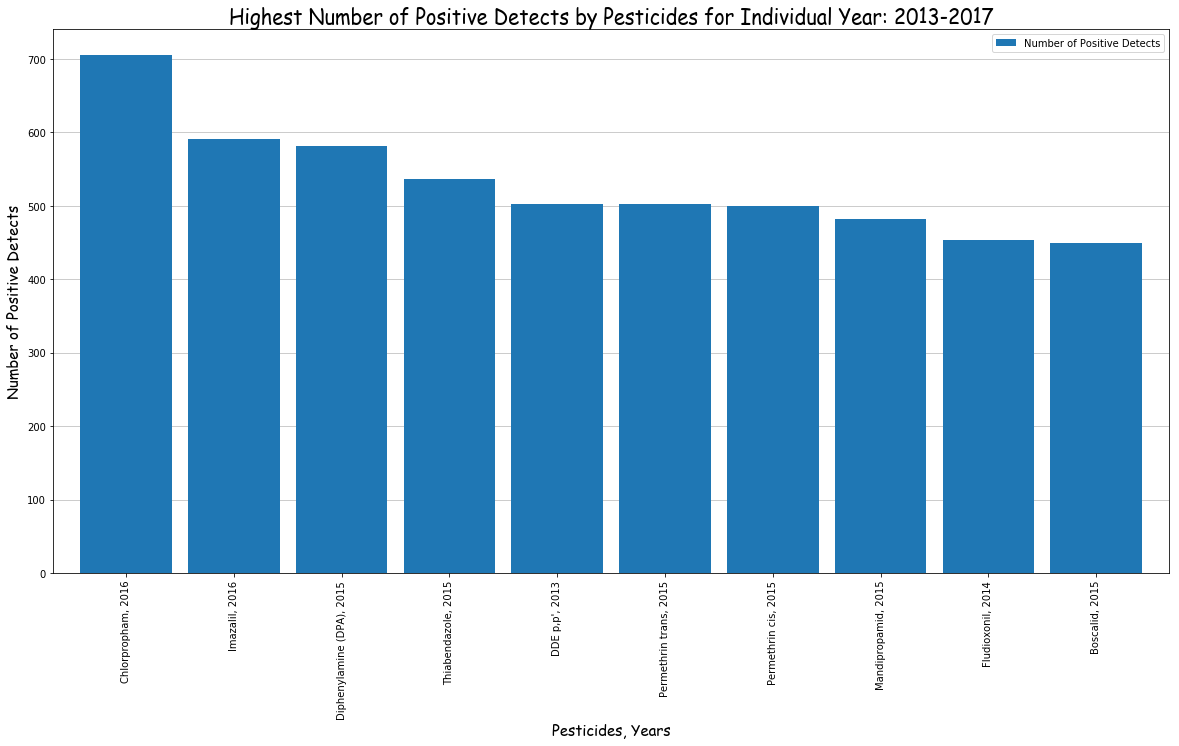

In [291]:
fig, ax = plt.subplots()
# df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
df1.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
ax.set_xlabel("Pesticides, Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Pesticides for Individual Year: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Highest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017')

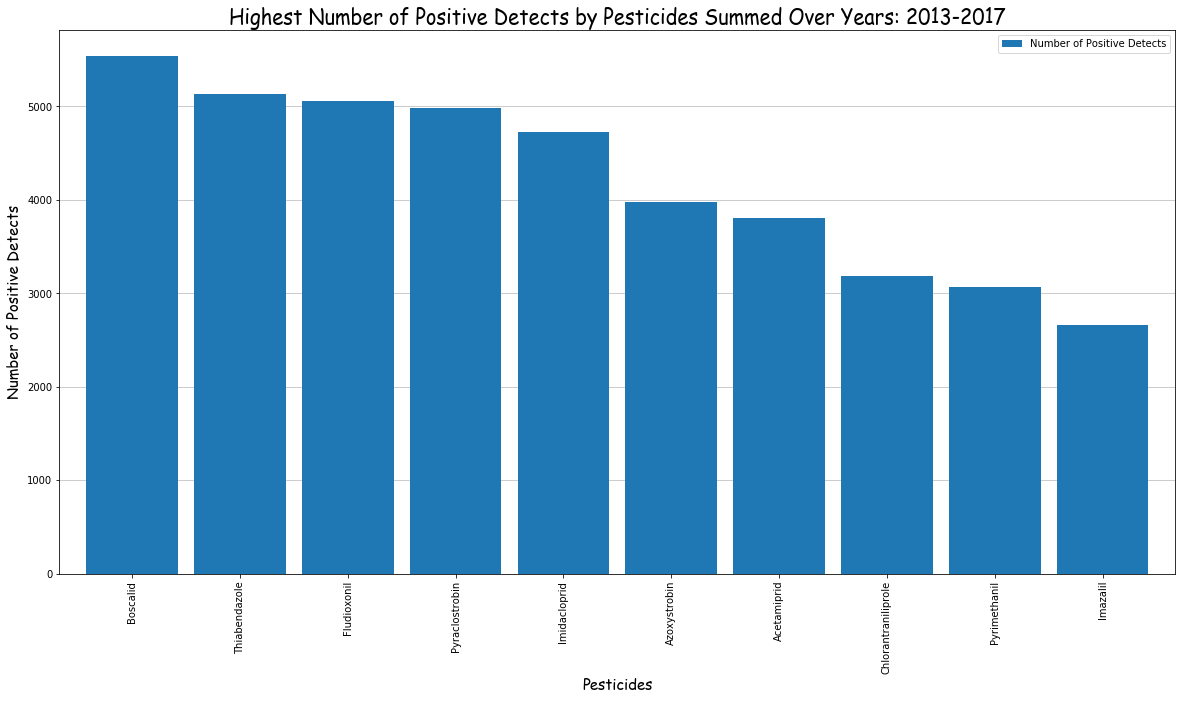

In [444]:
fig, ax = plt.subplots()
# df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
df1C.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
ax.set_xlabel("Pesticides", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Lowest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017')

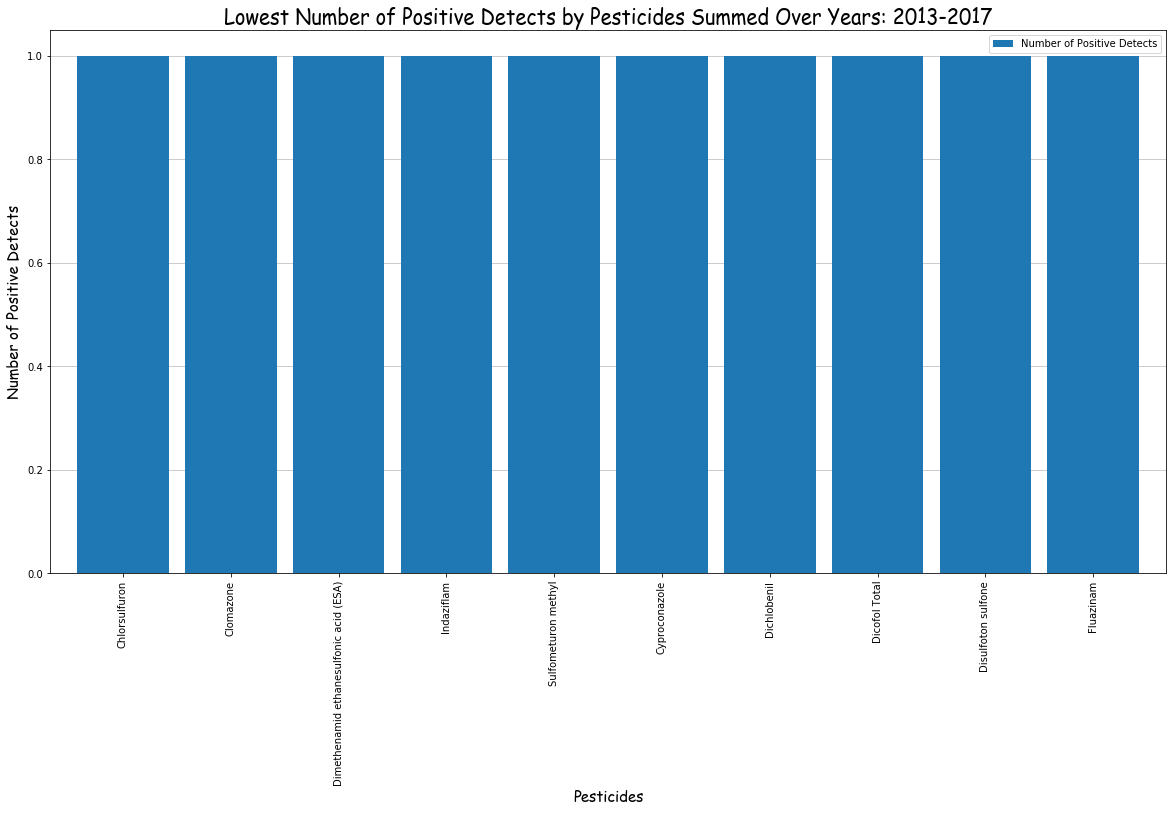

In [447]:
fig, ax = plt.subplots()
# df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
df1Cb.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
ax.set_xlabel("Pesticides", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Lowest Number of Positive Detects by Pesticides Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Highest Number of Positive Detects by Crop for Individual Year: 2013-2017')

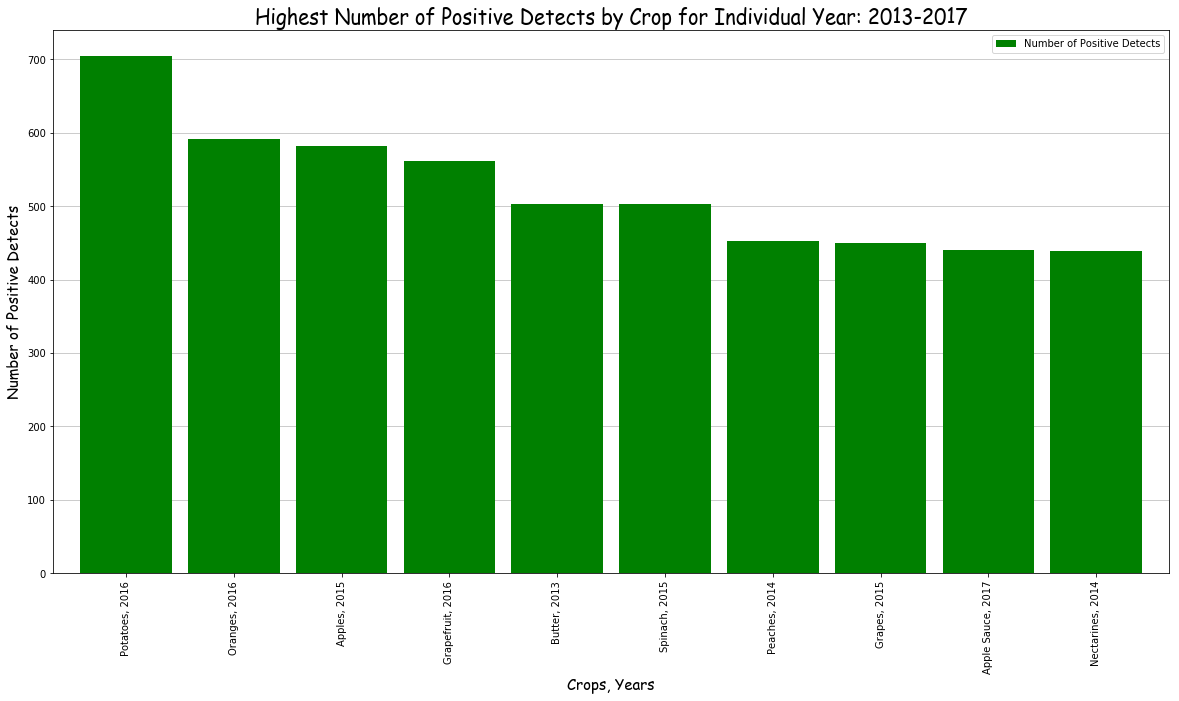

In [448]:
fig, ax = plt.subplots()
# df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
df2.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3, color='green') 
ax.set_xlabel("Crops, Years", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Crop for Individual Year: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Highest Number of Positive Detects by Crop Summed Over Years: 2013-2017')

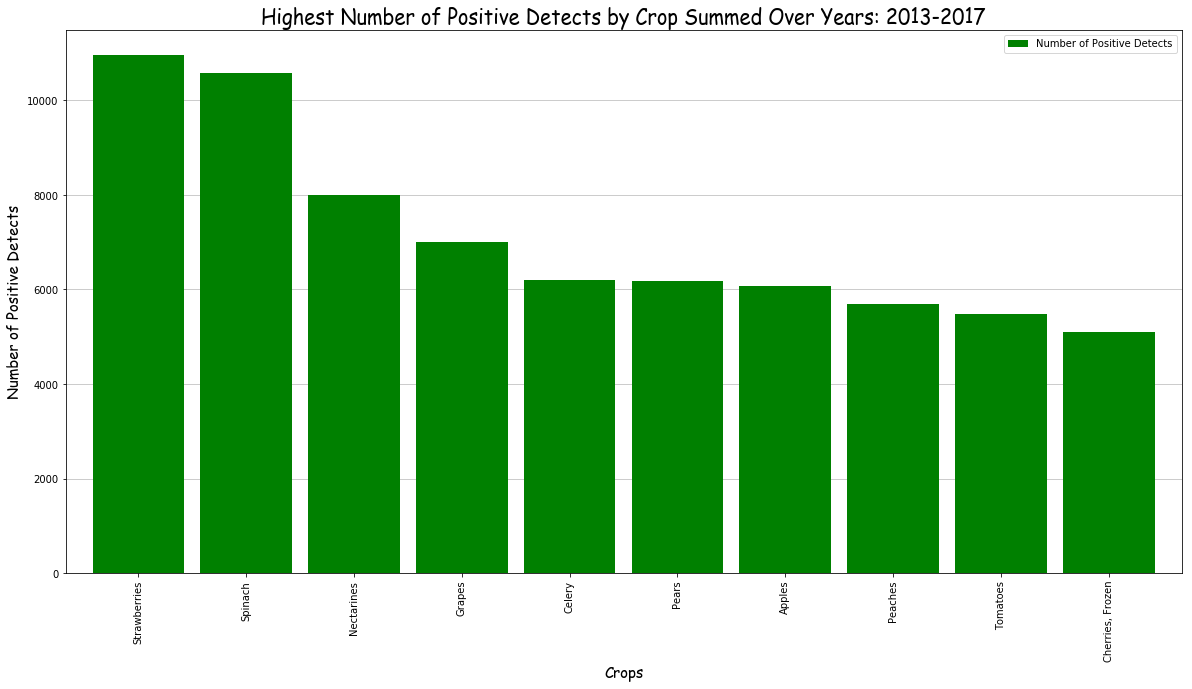

In [450]:
fig, ax = plt.subplots()
# df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
df2C.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3, color='green') 
ax.set_xlabel("Crops", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Highest Number of Positive Detects by Crop Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

Text(0.5, 1.0, 'Lowest Number of Positive Detects by Crop Summed Over Years: 2013-2017')

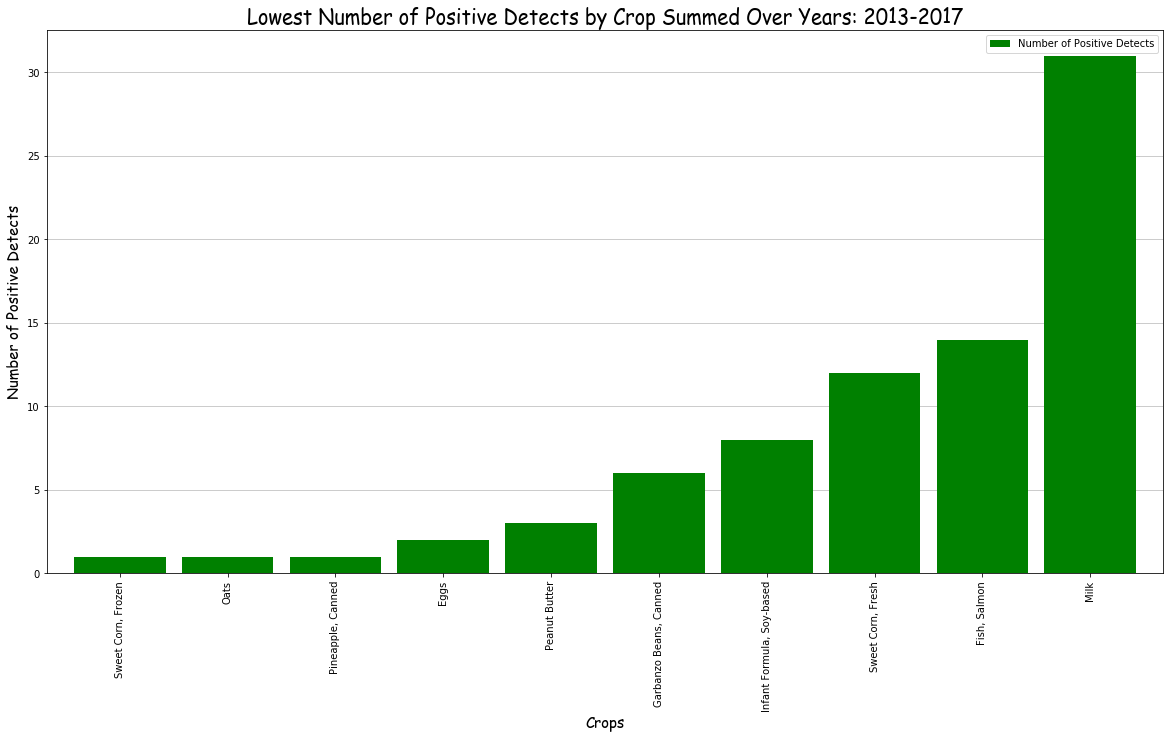

In [449]:
fig, ax = plt.subplots()
# df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
df2Cb.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3, color='green') 
ax.set_xlabel("Crops", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Number of Positive Detects", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.title('Lowest Number of Positive Detects by Crop Summed Over Years: 2013-2017', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

# COST

## 6. How do the prices for organic and conventional foods compare in the U.S.?

Another very important factor to consider when choosing to buy conventional food or organic food items is their respective prices. Often, organic food prices can be much less affordable than conventional, but this is not true for every food item out there. Additionally, prices can vary depending on the seller of the food items. In this section, we dive into the prices for specific produce at 8 different U.S. retail stores to examine this issue further. Additionally, we highlight some of the price trends for organic and conventional produce over time to see if organic food has become more affordable. 

### 6.1 - Price of Organic v.s. Conventional Produce from Sellers in 2015

We first examine the prices of oranic and conventional produce for 8 different U.S. retailers from 2015.

#### Data Wrangling

We start by creating a path to the excel sheet (converted from PDF and cleaned for misaligned rows during conversion). Then, we open am xlrs workbook for the file and access the first sheet. 

In [389]:
# Imports the xlsx file and verifies it is the correct data with title and number of sheets
path_to_milk_data = os.path.join('Data', '6', 'PricesConsumer', 'Cost of Organic Food - Consumer Reports.xlsx')

workbook = xlrd.open_workbook(path_to_milk_data)
sheet = workbook.sheets()[0]

C:\ANACONDA\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
C:\ANACONDA\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
C:\ANACONDA\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.


We now load on in the row values from the sheet into an array. We have to merge two arrays here in order to handle dealing with the unnecessary data from rows 7-11.

In [390]:
# An array or arrays that hold the strings for each value in rows 6 to 114
data_rowsA = [sheet.row_values(r) for r in range(4, 6)]
data_rowsB = [sheet.row_values(r) for r in range(11, 132)]
for r in data_rowsB:
    data_rowsA.append(r)
data_rows = data_rowsA

Next, we initialize necessary arrays for storing the xlrs data before parsing further into arrays that will be used for graphing. We also clean the rows of empty characters.

In [391]:
cleaned_rows = []
titles1 = []
titles1.append('Apples (lb.)')
titles2 = []
titles2.append('Apples (lb.)')
tableData1 = []
tableData2 = []
avg1 = data_rows[60]
for r in avg1:
    if r == '':
        avg1.remove(r)
        
        avg2 = data_rows[121]
for r in avg2:
    if r == '':
        avg2.remove(r)

Now, the data for each table is wrangled. We clean the data via replacing certain string characters with empty strings and converting some values to look like decimals rather than strings to represent numbers. We do all of this preprocessing to ensure that all the values will be able to be converting to floats later for graphing them.

In [392]:
counter = 0
for row in data_rows[1:60]:
    new_row = []
    for item in row:
        if item == '':
            continue
        if type(item) == str:
            item = item.replace('$', '').replace('/lb.', '')
#             print('$/lb. : '+item)
            if ' cents' in item:
#                 item = item.replace(' ', '')
                item = '0.'+item[0]+item[1]
                item = float(item)
#         print(item)
        new_row.append(item)
#     cleaned_rows.append(new_row)
    tableData1.append(new_row)
    
for row in data_rows[62:121]:
    new_row = []
    for item in row:
        if item == '':
            continue
        if type(item) == str:
            item = item.replace('$', '').replace('/lb.', '')
#             print('$/lb. : '+item)
            if ' cents' in item:
#                 item = item.replace(' ', '')
                item = '0.'+item[0]+item[1]
                item = float(item)
#         print(item)
        new_row.append(item)
#     cleaned_rows.append(new_row)
    tableData2.append(new_row)

# print(titles1) 
# print(tableData1)
# print(tableData2)

The titles for each row are now stripped and out in separate arrays, as well as the data. Additionally, empty data rows are deleted form the array. 

In [393]:
avg1Title = avg1[0]
avg2Title = avg2[0]

avg1 = avg1[1:5]
avg2 = avg2[1:5]

for index, row in enumerate(tableData1):
    titles1.append(row[0])
    tableData1[index] = row[1:5]
    
for row in tableData1:
    if len(row) == 0:
        tableData1.remove(row)

for index, row in enumerate(tableData2):
    titles2.append(row[0])
    tableData2[index] = row[1:5]
    
for row in tableData2:
    if len(row) == 0:
        tableData2.remove(row)

# mainTitle = None
# mainTitles1 = []
# subTitles1 = []
# for i in range(0, len(titles1), 4):
#     mainTitle = titles1[i] 
#     titles1[i+1] = mainTitle+", "+titles1[i+1] 
#     titles1[i+2] = mainTitle+", "+titles1[i+2]
#     titles1[i+3] = mainTitle+", "+titles1[i+3]
#     mainTitles1.append(mainTitle)
#     subTitles1.append(titles1[i+1])
#     subTitles1.append(titles1[i+2])
#     subTitles1.append(titles1[i+3])

# mainTitles2 = []
# subTitles2 = []
# for i in range(0, len(titles2), 4):
#     mainTitle = titles2[i] 
#     titles2[i+1] = mainTitle+", "+titles2[i+1] 
#     titles2[i+2] = mainTitle+", "+titles2[i+2]
#     titles2[i+3] = mainTitle+", "+titles2[i+3]
#     mainTitles2.append(mainTitle)
#     subTitles2.append(titles2[i+1])
#     subTitles2.append(titles2[i+2])
#     subTitles2.append(titles2[i+3])        
        
# print(tableData2)

# print(len(tableData1))
# print(len(tableData2)) 

# print(len(subTitles1))
# print(len(subTitles2))

# print(avg1)
# print(avg2)

# print(avg1Title)
# print(avg2Title)

# tableData1 = cleaned_rows[1:61]
# tableData1Average = cleaned_rows[61]
# tableData2 = cleaned_rows[63:122]
# tableData2Average = cleaned_rows[122]

The next step is to insert the data for each retailer into the respective arrays. This data is further broken down for graphing specific types of data (organic or conventional) among each retailer. 

In [394]:
amazonFresh = []
freshDirect = []
harrisTeeter = []
peapod = []
priceChopper = []
safeway = []
walmart = []
wholeFoods = []

for row in tableData1:
#     titles.append(row[0])
    amazonFresh.append(row[0])
    freshDirect.append(row[1])
    harrisTeeter.append(row[2])
    peapod.append(row[3])
    
for row in tableData2:
#     titles.append(row[0])
    priceChopper.append(row[0])
    safeway.append(row[1])
    walmart.append(row[2])
    wholeFoods.append(row[3])
    
amazonFreshConv = []
freshDirectConv = []
harrisTeeterConv = []
peapodConv = []
priceChopperConv = []
safewayConv = []
walmartConv = []
wholeFoodsConv = []

amazonFreshOrg = []
freshDirectOrg = []
harrisTeeterOrg = []
peapodOrg = []
priceChopperOrg = []
safewayOrg = []
walmartOrg = []
wholeFoodsOrg = []

# amazonFreshPerc = []
# freshDirectPerc = []
# harrisTeeterPerc = []
# peapodPerc = []
# priceChopperPerc = []
# safewayPerc = []
# walmartPerc = []
# wholeFoodsPerc = []

for i in range(0, len(amazonFresh), 3):
    amazonFreshConv.append(amazonFresh[i])
    freshDirectConv.append(freshDirect[i])
    harrisTeeterConv.append(harrisTeeter[i])
    peapodConv.append(peapod[i])
    priceChopperConv.append(priceChopper[i])
    safewayConv.append(safeway[i])
    walmartConv.append(walmart[i])
    wholeFoodsConv.append(wholeFoods[i])

for i in range(1, len(amazonFresh), 3):
    amazonFreshOrg.append(amazonFresh[i])
    freshDirectOrg.append(freshDirect[i])
    harrisTeeterOrg.append(harrisTeeter[i])
    peapodOrg.append(peapod[i])
    priceChopperOrg.append(priceChopper[i])
    safewayOrg.append(safeway[i])
    walmartOrg.append(walmart[i])
    wholeFoodsOrg.append(wholeFoods[i])
    
# for i in range(2, len(amazonFresh), 3):
#     amazonFreshPerc.append(amazonFresh[i])
#     freshDirectPerc.append(freshDirect[i])
#     harrisTeeterPerc.append(harrisTeeter[i])
#     peapodPerc.append(peapod[i])
#     priceChopperPerc.append(priceChopper[i])
#     safewayPerc.append(safeway[i])
#     walmartPerc.append(walmart[i])
#     wholeFoodsPerc.append(wholeFoods[i])
    
# subTitles1Conv = []
# subTitles2Conv = []
# subTitles1Org = []
# subTitles2Org = []
# subTitles1Perc = []
# subTitles2Perc = []

# for i in range(0, len(subTitles1), 3):
#     subTitles1Conv.append(subTitles1[i])
#     subTitles2Conv.append(subTitles2[i])    
    
# for i in range(1, len(subTitles1), 3):
#     subTitles1Org.append(subTitles1[i])
#     subTitles2Org.append(subTitles2[i])    
    
# for i in range(2, len(subTitles1), 3):
#     subTitles1Perc.append(subTitles1[i])
#     subTitles2Perc.append(subTitles2[i])

# print(len(amazonFreshPerc))
# print(len(subTitles1Perc))

In [ ]:
# All the data to be graphed is stored in the proper dataframe varibles. Each dataframe variable corresponds to a separate graph and the values are conveted to float to be able to be read properly by matplotlib. 

In [267]:
# # df = pd.DataFrame({'Conventional': conventional,
# #                    'Organic': organic}, index=titles)

# data1Conv = {#'Produce Item' : subTitles1Conv,
#          'Amazon Fresh' : amazonFreshConv,
#          'Fresh Direct' : freshDirectConv,
#          'Harris Teeter' : harrisTeeterConv,
#          'Peapod' : peapodConv}

# data2Conv = {#'Produce Item' : subTitles2Conv,
#         'Price Chopper' : priceChopperConv,
#         'Safeway' : safewayConv,
#         'Walmart' : walmartConv,
#         'Whole Foods' : wholeFoodsConv}

# data1Org = {#'Produce Item' : subTitles1Org,
#          'Amazon Fresh' : amazonFreshOrg,
#          'Fresh Direct' : freshDirectOrg,
#          'Harris Teeter' : harrisTeeterOrg,
#          'Peapod' : peapodOrg}

# data2Org = {#'Produce Item' : subTitles2Org,
#         'Price Chopper' : priceChopperOrg,
#         'Safeway' : safewayOrg,
#         'Walmart' : walmartOrg,
#         'Whole Foods' : wholeFoodsOrg}

# data1Perc = {#'Produce Item' : subTitles1Perc,
#          'Amazon Fresh' : amazonFreshPerc,
#          'Fresh Direct' : freshDirectPerc,
#          'Harris Teeter' : harrisTeeterPerc,
#          'Peapod' : peapodPerc}

# data2Perc = {#'Produce Item' : subTitles2Perc,
#         'Price Chopper' : priceChopperPerc,
#         'Safeway' : safewayPerc,
#         'Walmart' : walmartPerc,
#         'Whole Foods' : wholeFoodsPerc}

# # print(data2Org)

# # df1 = pd.DataFrame(data1)
# # df1.set_index('Produce Item')
# # df2 = pd.DataFrame(data2)

# df1Conv = pd.DataFrame(data1Conv, index=subTitles1Conv)
# df1Conv = df1Conv.astype(float)
# df2Conv = pd.DataFrame(data2Conv, index=subTitles2Conv)
# df2Conv = df2Conv.astype(float)

# df1Org = pd.DataFrame(data1Org, index=subTitles1Org)
# df1Org = df1Org.astype(float)
# df2Org = pd.DataFrame(data2Org, index=subTitles2Org)
# df2Org = df2Org.astype(float)

# df1Perc = pd.DataFrame(data1Perc, index=subTitles1Perc)
# df1Perc = df1Perc.astype(float)
# df2Perc = pd.DataFrame(data2Perc, index=subTitles2Perc)
# df2Perc = df2Perc.astype(float)
# # df1Perc

Finally, we store the values for each retailer in their respective arrays (an entry for each produce item), while also converting values to float to prepare to be graphed. we do this for both conventional and organic values. 

In [395]:
stores = ['Amazon Fresh', 'Fresh Direct', 'Harris Teeter', 'Peapod', 'Price Chopper', 'Safeway', 'Walmart', 'Whole Foods']
produce = ['Apples', 'Bananas', 'Beef', 'Butter', 'Carrots', 'Chicken', 'Cream Cheese', 'Eggs', 'Honey', 'Iceberg Lettuce', 'Maple Syrup', 'Milk', 'Olive Oil', 'Strawberries', 'Zucchini']

applesConv = []
bananasConv = []
beefConv = []
butterConv = []
carrotsConv = []
chickenConv = []
creamCheeseConv = []
eggsConv = []
honeyConv = []
icebergLettuceConv = []
mapleSyrupConv = []
milkConv = []
oliveOilConv = []
strawberriesConv = []
zucchiniConv = []

applesConvb = []
bananasConvb = []
beefConvb = []
butterConvb = []
carrotsConvb = []
chickenConvb = []
creamCheeseConvb = []
eggsConvb = []
honeyConvb = []
icebergLettuceConvb = []
mapleSyrupConvb = []
milkConvb = []
oliveOilConvb = []
strawberriesConvb = []
zucchiniConvb = []

produceArraysConv = [applesConv, bananasConv, beefConv, butterConv, carrotsConv, chickenConv, creamCheeseConv, eggsConv, 
                 honeyConv, icebergLettuceConv, mapleSyrupConv, milkConv, oliveOilConv, strawberriesConv, zucchiniConv]

produceArraysConvb = [applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, 
                 honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb, oliveOilConvb, strawberriesConvb, zucchiniConvb]

convArrays = [amazonFreshConv, freshDirectConv, harrisTeeterConv, peapodConv, 
              priceChopperConv, safewayConv, walmartConv, wholeFoodsConv]

for arr in convArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
#             item = 0
            item = None
        else:
            item = float(item)
        produceArraysConv[index].append(item)
        index += 1
        
for arr in convArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        produceArraysConvb[index].append(item)
        index += 1
        
        
# print(applesConv)

applesOrg = []
bananasOrg = []
beefOrg = []
butterOrg = []
carrotsOrg = []
chickenOrg = []
creamCheeseOrg = []
eggsOrg = []
honeyOrg = []
icebergLettuceOrg = []
mapleSyrupOrg = []
milkOrg = []
oliveOilOrg = []
strawberriesOrg = []
zucchiniOrg = []

applesOrgb = []
bananasOrgb = []
beefOrgb = []
butterOrgb = []
carrotsOrgb = []
chickenOrgb = []
creamCheeseOrgb = []
eggsOrgb = []
honeyOrgb = []
icebergLettuceOrgb = []
mapleSyrupOrgb = []
milkOrgb = []
oliveOilOrgb = []
strawberriesOrgb = []
zucchiniOrgb = []

produceArraysOrg = [applesOrg, bananasOrg, beefOrg, butterOrg, carrotsOrg, chickenOrg, creamCheeseOrg, eggsOrg, 
                 honeyOrg, icebergLettuceOrg, mapleSyrupOrg, milkOrg, oliveOilOrg, strawberriesOrg, zucchiniOrg]

produceArraysOrgb = [applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, 
                 honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb, oliveOilOrgb, strawberriesOrgb, zucchiniOrgb]

orgArrays = [amazonFreshOrg, freshDirectOrg, harrisTeeterOrg, peapodOrg, 
              priceChopperOrg, safewayOrg, walmartOrg, wholeFoodsOrg]

for arr in orgArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
#             item = 0
            item = None
        else:
            item = float(item)
        produceArraysOrg[index].append(item)
        index += 1
        
for arr in orgArrays:
    index = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        produceArraysOrgb[index].append(item)
        index += 1
        
        
# print(applesOrg)

# applesDiff = []
# bananasDiff = []
# beefDiff = []
# butterDiff = []
# carrotsDiff = []
# chickenDiff = []
# creamCheeseDiff = []
# eggsDiff = []
# honeyDiff = []
# icebergLettuceDiff = []
# mapleSyrupDiff = []
# milkDiff = []
# oliveOilDiff = []
# strawberriesDiff = []
# zucchiniDiff = []

# produceArraysDiff = [applesDiff, bananasDiff, beefDiff, butterDiff, carrotsDiff, chickenDiff, creamCheeseDiff, eggsDiff, 
#                  honeyDiff, icebergLettuceDiff, mapleSyrupDiff, milkDiff, oliveOilDiff, strawberriesDiff, zucchiniDiff]

# amazonFreshDiffConv = [] 
# freshDirectDiffConv = [] 
# harrisTeeterDiffConv = [] 
# peapodDiffConv = [] 
# priceChopperDiffConv = [] 
# safewayDiffConv = [] 
# walmartDiffConv= [] 
# wholeFoodsDiffConv = []

# amazonFreshDiffOrg = [] 
# freshDirectDiffOrg = [] 
# harrisTeeterDiffOrg = [] 
# peapodDiffOrg = [] 
# priceChopperDiffOrg = [] 
# safewayDiffOrg = [] 
# walmartDiffOrg= [] 
# wholeFoodsDiffOrg = []

# diffArraysConv = [amazonFreshDiffConv, freshDirectDiffConv, harrisTeeterDiffConv, peapodDiffConv, 
#               priceChopperDiffConv, safewayDiffConv, walmartDiffConv, wholeFoodsDiffConv]

# diffArraysOrg  = [amazonFreshDiffOrg , freshDirectDiffOrg , harrisTeeterDiffOrg , peapodDiffOrg , 
#               priceChopperDiffOrg , safewayDiffOrg , walmartDiffOrg , wholeFoodsDiffOrg ]

diffConv = []
diffOrg = []

for arr in convArrays:
    cumSumConv = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        cumSumConv =  cumSumConv + item   
    diffConv.append(cumSumConv)

for arr in orgArrays:
    cumSumOrg = 0
    for item in arr:
        if item == 'NaN':
            item = 0
        item = float(item)
        cumSumOrg =  cumSumOrg + item   
    diffOrg.append(cumSumOrg)
        
dfDiff = pd.DataFrame({'Conventional': diffConv,
                   'Organic': diffOrg}, index=stores)        
# print(amazonFreshDiffConv)
# dfDiff

#### Data Visualization

Using the data frame we just created from scraping the excel data sheet, we can plot three graphs. The first graph below highlights the major retailer prices for conventional produce in 2015.

[Text(0, 0, ''),
 Text(0, 0, 'Amazon Fresh'),
 Text(0, 0, 'Fresh Direct'),
 Text(0, 0, 'Harris Teeter'),
 Text(0, 0, 'Peapod'),
 Text(0, 0, 'Price Chopper'),
 Text(0, 0, 'Safeway'),
 Text(0, 0, 'Walmart'),
 Text(0, 0, 'Whole Foods')]

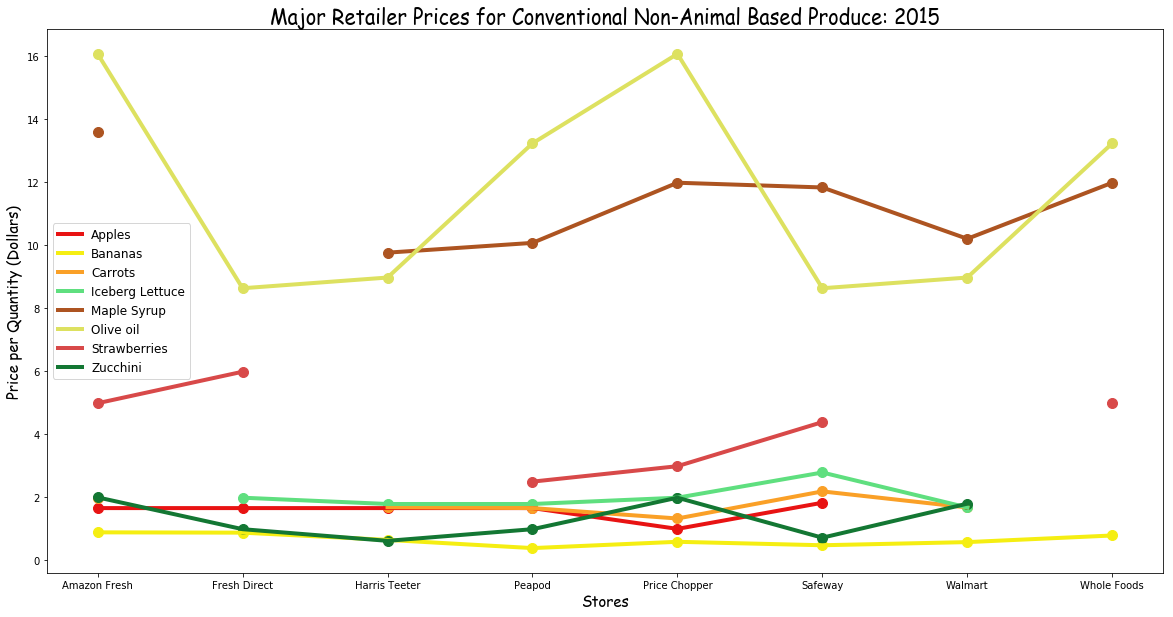

In [382]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(applesConv, 'o', markersize=10, color = '#E81313', zorder = 3)
ax.plot(bananasConv, 'o', markersize=10, color = '#F5EE12', zorder = 3)
ax.plot(carrotsConv, 'o', markersize=10, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceConv, 'o', markersize=10, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupConv, 'o', markersize=10, color = '#AD5421', zorder = 3)
ax.plot(oliveOilConv, 'o', markersize=10, color = '#DDE160', zorder = 3)
ax.plot(strawberriesConv, 'o', markersize=10, color = '#D84949', zorder = 3)
ax.plot(zucchiniConv, 'o', markersize=10, color = '#137733', zorder = 3)

# Plot the lines
ax.plot(applesConv, 'g', label = 'Apples', linewidth=4, color = '#E81313', zorder = 3)
ax.plot(bananasConv, 'g', label = 'Bananas', linewidth=4, color = '#F5EE12', zorder = 3)
ax.plot(carrotsConv, 'g', label = 'Carrots', linewidth=4, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceConv, 'g', label = 'Iceberg Lettuce', linewidth=4, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupConv, 'g', label = 'Maple Syrup', linewidth=4, color = '#AD5421', zorder = 3)
ax.plot(oliveOilConv, 'g', label = 'Olive oil', linewidth=4, color = '#DDE160', zorder = 3)
ax.plot(strawberriesConv, 'g', label = 'Strawberries', linewidth=4, color = '#D84949', zorder = 3)
ax.plot(zucchiniConv, 'g', label = 'Zucchini', linewidth=4, color = '#137733', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Conventional Non-Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Fresh Direct', 'Harris Teeter', 'Peapod', 'Price Chopper', 'Safeway', 'Walmart', 'Whole Foods'])

[Text(0, 0, ''),
 Text(0, 0, 'Amazon Fresh'),
 Text(0, 0, 'Fresh Direct'),
 Text(0, 0, 'Harris Teeter'),
 Text(0, 0, 'Peapod'),
 Text(0, 0, 'Price Chopper'),
 Text(0, 0, 'Safeway'),
 Text(0, 0, 'Walmart'),
 Text(0, 0, 'Whole Foods')]

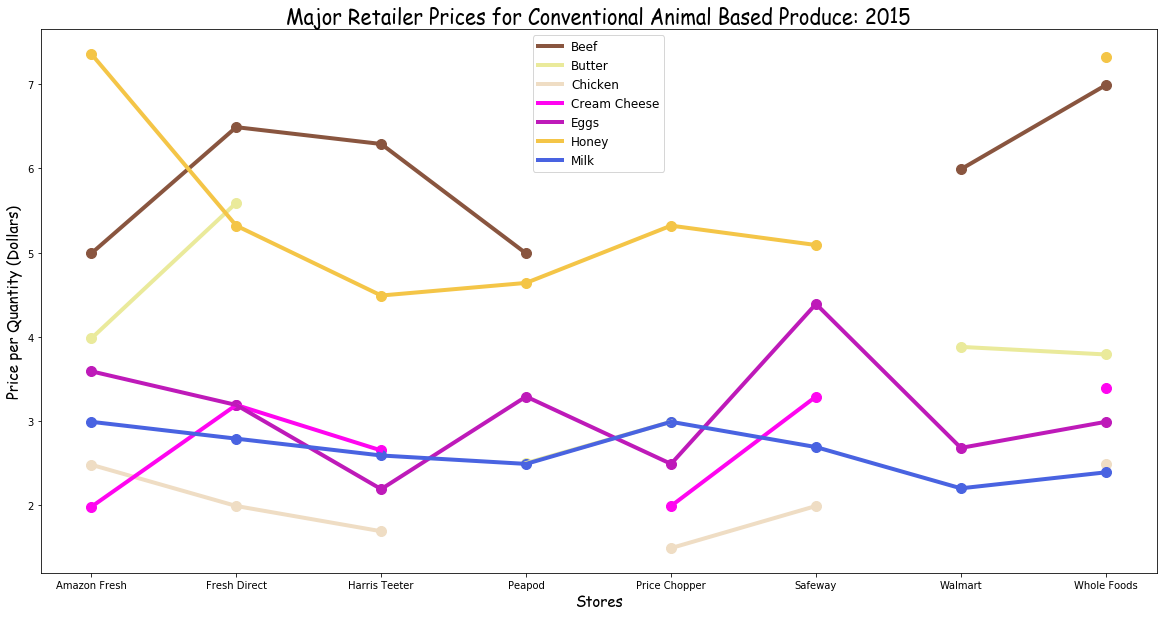

In [381]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(beefConv, 'o', markersize=10, color = '#89553F', zorder = 3)
ax.plot(butterConv, 'o', markersize=10, color = '#EAEA9B', zorder = 3)
ax.plot(chickenConv, 'o', markersize=10, color = '#EFDDC4', zorder = 3)
ax.plot(creamCheeseConv, 'o', markersize=10, color = '#FF05F0', zorder = 3)
ax.plot(eggsConv, 'o', markersize=10, color = '#BE1AB9', zorder = 3)
ax.plot(honeyConv, 'o', markersize=10, color = '#F4C547', zorder = 3)
ax.plot(milkConv, 'o', markersize=10, color = '#4963E1', zorder = 3)

# Plot the lines
ax.plot(beefConv, 'g', label = 'Beef', linewidth=4, color = '#89553F', zorder = 3)
ax.plot(butterConv, 'g', label = 'Butter', linewidth=4, color = '#EAEA9B', zorder = 3)
ax.plot(chickenConv, 'g', label = 'Chicken', linewidth=4, color = '#EFDDC4', zorder = 3)
ax.plot(creamCheeseConv, 'g', label = 'Cream Cheese', linewidth=4, color = '#FF05F0', zorder = 3)
ax.plot(eggsConv, 'g', label = 'Eggs', linewidth=4, color = '#BE1AB9', zorder = 3)
ax.plot(honeyConv, 'g', label = 'Honey', linewidth=4, color = '#F4C547', zorder = 3)
ax.plot(milkConv, 'g', label = 'Milk', linewidth=4, color = '#4963E1', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Conventional Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Fresh Direct', 'Harris Teeter', 'Peapod', 'Price Chopper', 'Safeway', 'Walmart', 'Whole Foods'])

[Text(0, 0, ''),
 Text(0, 0, 'Amazon Fresh'),
 Text(0, 0, 'Fresh Direct'),
 Text(0, 0, 'Harris Teeter'),
 Text(0, 0, 'Peapod'),
 Text(0, 0, 'Price Chopper'),
 Text(0, 0, 'Safeway'),
 Text(0, 0, 'Walmart'),
 Text(0, 0, 'Whole Foods')]

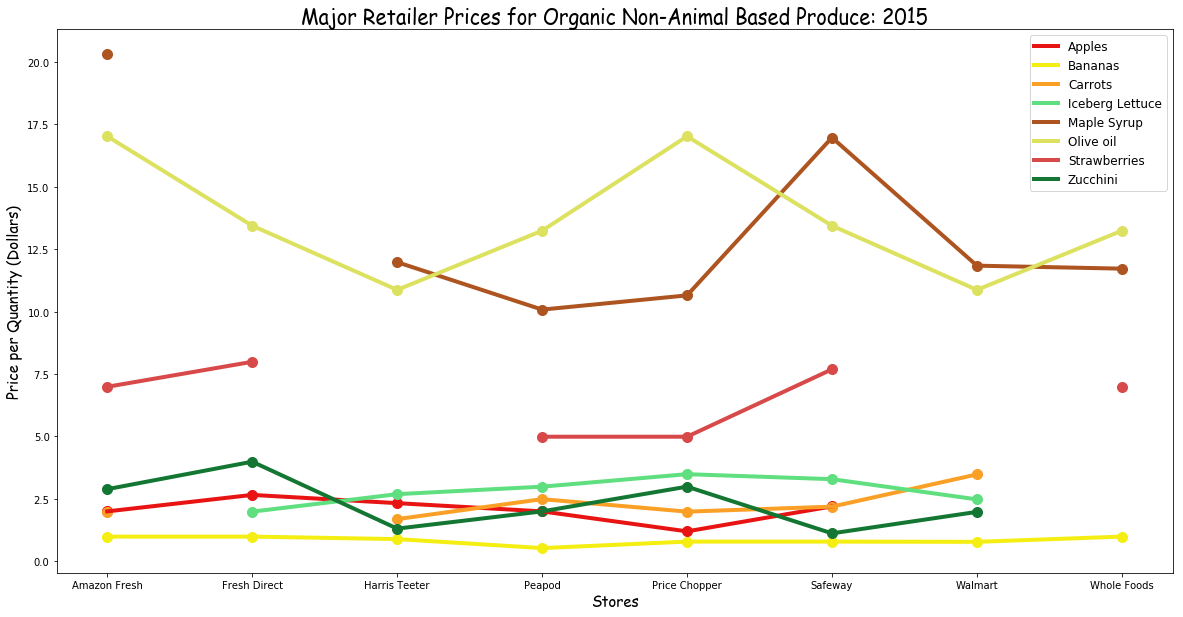

In [387]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(applesOrg, 'o', markersize=10, color = '#E81313', zorder = 3)
ax.plot(bananasOrg, 'o', markersize=10, color = '#F5EE12', zorder = 3)
ax.plot(carrotsOrg, 'o', markersize=10, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceOrg, 'o', markersize=10, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupOrg, 'o', markersize=10, color = '#AD5421', zorder = 3)
ax.plot(oliveOilOrg, 'o', markersize=10, color = '#DDE160', zorder = 3)
ax.plot(strawberriesOrg, 'o', markersize=10, color = '#D84949', zorder = 3)
ax.plot(zucchiniOrg, 'o', markersize=10, color = '#137733', zorder = 3)

# Plot the lines
ax.plot(applesOrg, 'g', label = 'Apples', linewidth=4, color = '#E81313', zorder = 3)
ax.plot(bananasOrg, 'g', label = 'Bananas', linewidth=4, color = '#F5EE12', zorder = 3)
ax.plot(carrotsOrg, 'g', label = 'Carrots', linewidth=4, color = '#FAA027', zorder = 3)
ax.plot(icebergLettuceOrg, 'g', label = 'Iceberg Lettuce', linewidth=4, color = '#5FDF7F', zorder = 3)
ax.plot(mapleSyrupOrg, 'g', label = 'Maple Syrup', linewidth=4, color = '#AD5421', zorder = 3)
ax.plot(oliveOilOrg, 'g', label = 'Olive oil', linewidth=4, color = '#DDE160', zorder = 3)
ax.plot(strawberriesOrg, 'g', label = 'Strawberries', linewidth=4, color = '#D84949', zorder = 3)
ax.plot(zucchiniOrg, 'g', label = 'Zucchini', linewidth=4, color = '#137733', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Organic Non-Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Fresh Direct', 'Harris Teeter', 'Peapod', 'Price Chopper', 'Safeway', 'Walmart', 'Whole Foods'])

[Text(0, 0, ''),
 Text(0, 0, 'Amazon Fresh'),
 Text(0, 0, 'Fresh Direct'),
 Text(0, 0, 'Harris Teeter'),
 Text(0, 0, 'Peapod'),
 Text(0, 0, 'Price Chopper'),
 Text(0, 0, 'Safeway'),
 Text(0, 0, 'Walmart'),
 Text(0, 0, 'Whole Foods')]

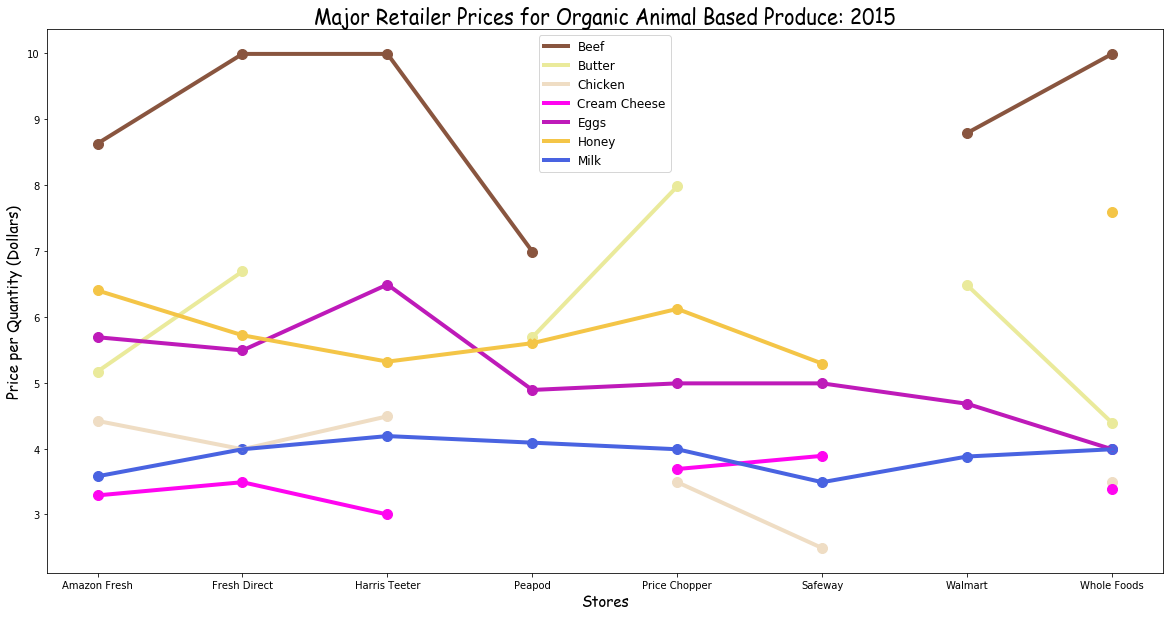

In [388]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# Plot the dots
ax.plot(beefOrg, 'o', markersize=10, color = '#89553F', zorder = 3)
ax.plot(butterOrg, 'o', markersize=10, color = '#EAEA9B', zorder = 3)
ax.plot(chickenOrg, 'o', markersize=10, color = '#EFDDC4', zorder = 3)
ax.plot(creamCheeseOrg, 'o', markersize=10, color = '#FF05F0', zorder = 3)
ax.plot(eggsOrg, 'o', markersize=10, color = '#BE1AB9', zorder = 3)
ax.plot(honeyOrg, 'o', markersize=10, color = '#F4C547', zorder = 3)
ax.plot(milkOrg, 'o', markersize=10, color = '#4963E1', zorder = 3)

# Plot the lines
ax.plot(beefOrg, 'g', label = 'Beef', linewidth=4, color = '#89553F', zorder = 3)
ax.plot(butterOrg, 'g', label = 'Butter', linewidth=4, color = '#EAEA9B', zorder = 3)
ax.plot(chickenOrg, 'g', label = 'Chicken', linewidth=4, color = '#EFDDC4', zorder = 3)
ax.plot(creamCheeseOrg, 'g', label = 'Cream Cheese', linewidth=4, color = '#FF05F0', zorder = 3)
ax.plot(eggsOrg, 'g', label = 'Eggs', linewidth=4, color = '#BE1AB9', zorder = 3)
ax.plot(honeyOrg, 'g', label = 'Honey', linewidth=4, color = '#F4C547', zorder = 3)
ax.plot(milkOrg, 'g', label = 'Milk', linewidth=4, color = '#4963E1', zorder = 3)

ax.set_xlabel('Stores', fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel('Price per Quantity (Dollars)', fontname='Comic Sans MS', fontsize=15)
plt.title('Major Retailer Prices for Organic Animal Based Produce: 2015', fontname='Comic Sans MS', fontsize=20)
ax.legend(loc='best', fontsize=12)
ax.set_xticklabels(['', 'Amazon Fresh', 'Fresh Direct', 'Harris Teeter', 'Peapod', 'Price Chopper', 'Safeway', 'Walmart', 'Whole Foods'])

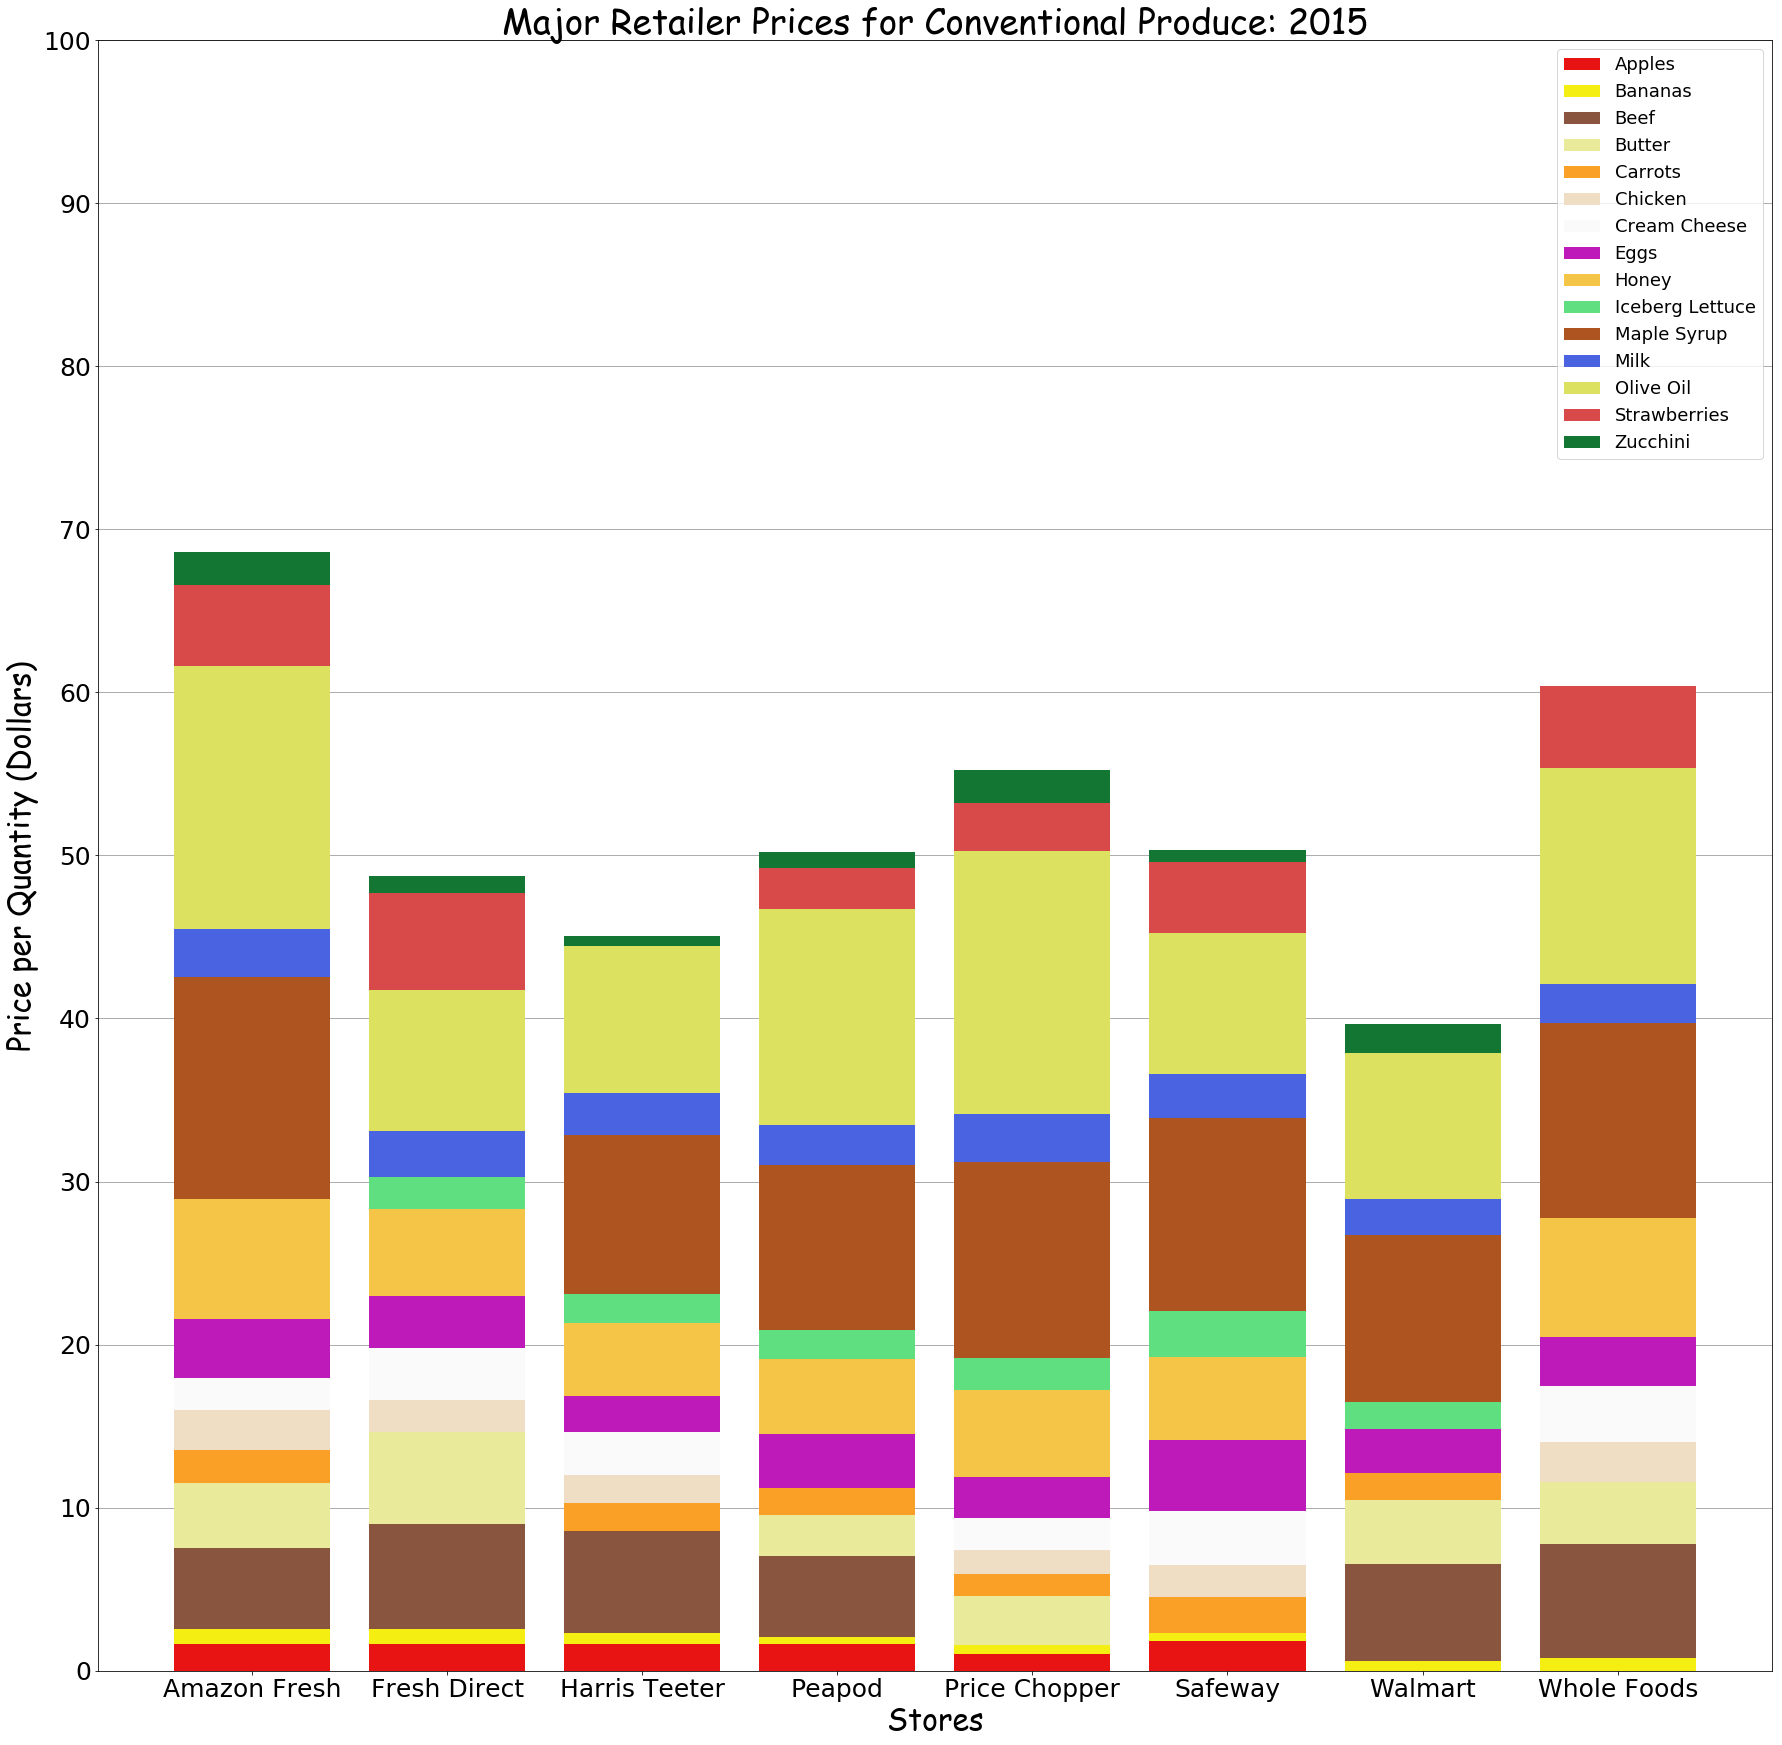

In [397]:
p1 = plt.bar(stores, applesConvb, color = '#E81313', zorder = 3)
p2 = plt.bar(stores, bananasConvb, bottom=applesConvb, color = '#F5EE12', zorder = 3)
p3 = plt.bar(stores, beefConvb, bottom=[i+j for i,j in zip(applesConvb, bananasConvb)], color = '#89553F', zorder = 3)
p4 = plt.bar(stores, butterConvb, bottom=[i+j+k for i,j,k in zip(applesConvb, bananasConvb, beefConvb)], color = '#EAEA9B', zorder = 3)
p5 = plt.bar(stores, carrotsConvb, bottom=[i+j+k+l for i,j,k,l in zip(applesConvb, bananasConvb, beefConvb, butterConvb)], color = '#FAA027', zorder = 3)
p6 = plt.bar(stores, chickenConvb, bottom=[i+j+k+l+m for i,j,k,l,m in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb)], color = '#EFDDC4', zorder = 3)
p7 = plt.bar(stores, creamCheeseConvb, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb)], color = '#FAFAFA', zorder = 3)
p8 = plt.bar(stores, eggsConvb, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb)], color = '#BE1AB9', zorder = 3)
p9 = plt.bar(stores, honeyConvb, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb)], color = '#F4C547', zorder = 3)
p10 = plt.bar(stores, icebergLettuceConvb, bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb)], color = '#5FDF7F', zorder = 3)
p11 = plt.bar(stores, mapleSyrupConvb, bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb)], color = '#AD5421', zorder = 3)
p12 = plt.bar(stores, milkConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb)], color = '#4963E1', zorder = 3)
p13 = plt.bar(stores, oliveOilConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t for i,j,k,l,m,n,o,p,q,r,s,t in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb)], color = '#DDE160', zorder = 3)
p14 = plt.bar(stores, strawberriesConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u for i,j,k,l,m,n,o,p,q,r,s,t,u in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb, oliveOilConvb)], color = '#D84949', zorder = 3)
p15 = plt.bar(stores, zucchiniConvb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v for i,j,k,l,m,n,o,p,q,r,s,t,u,v in zip(applesConvb, bananasConvb, beefConvb, butterConvb, carrotsConvb, chickenConvb, creamCheeseConvb, eggsConvb, honeyConvb, icebergLettuceConvb, mapleSyrupConvb, milkConvb, oliveOilConvb, strawberriesConvb)], color = '#137733', zorder = 3)

tens = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df1Conv.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
plt.xlabel("Stores", fontname='Comic Sans MS', fontsize=30)
plt.ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(tens, fontsize=25)
plt.grid(axis='y', alpha = 0.4, color = 'black', zorder = 3)
# plt.xaxis.grid(False)
plt.title('Major Retailer Prices for Conventional Produce: 2015', fontname='Comic Sans MS', fontsize=35)
plt.legend(produce, loc='best', fontsize=18)
# plt.rcParams['figure.figsize'] = [30, 30]

The second graph highlights the major retailer prices for organic produce in 2015.

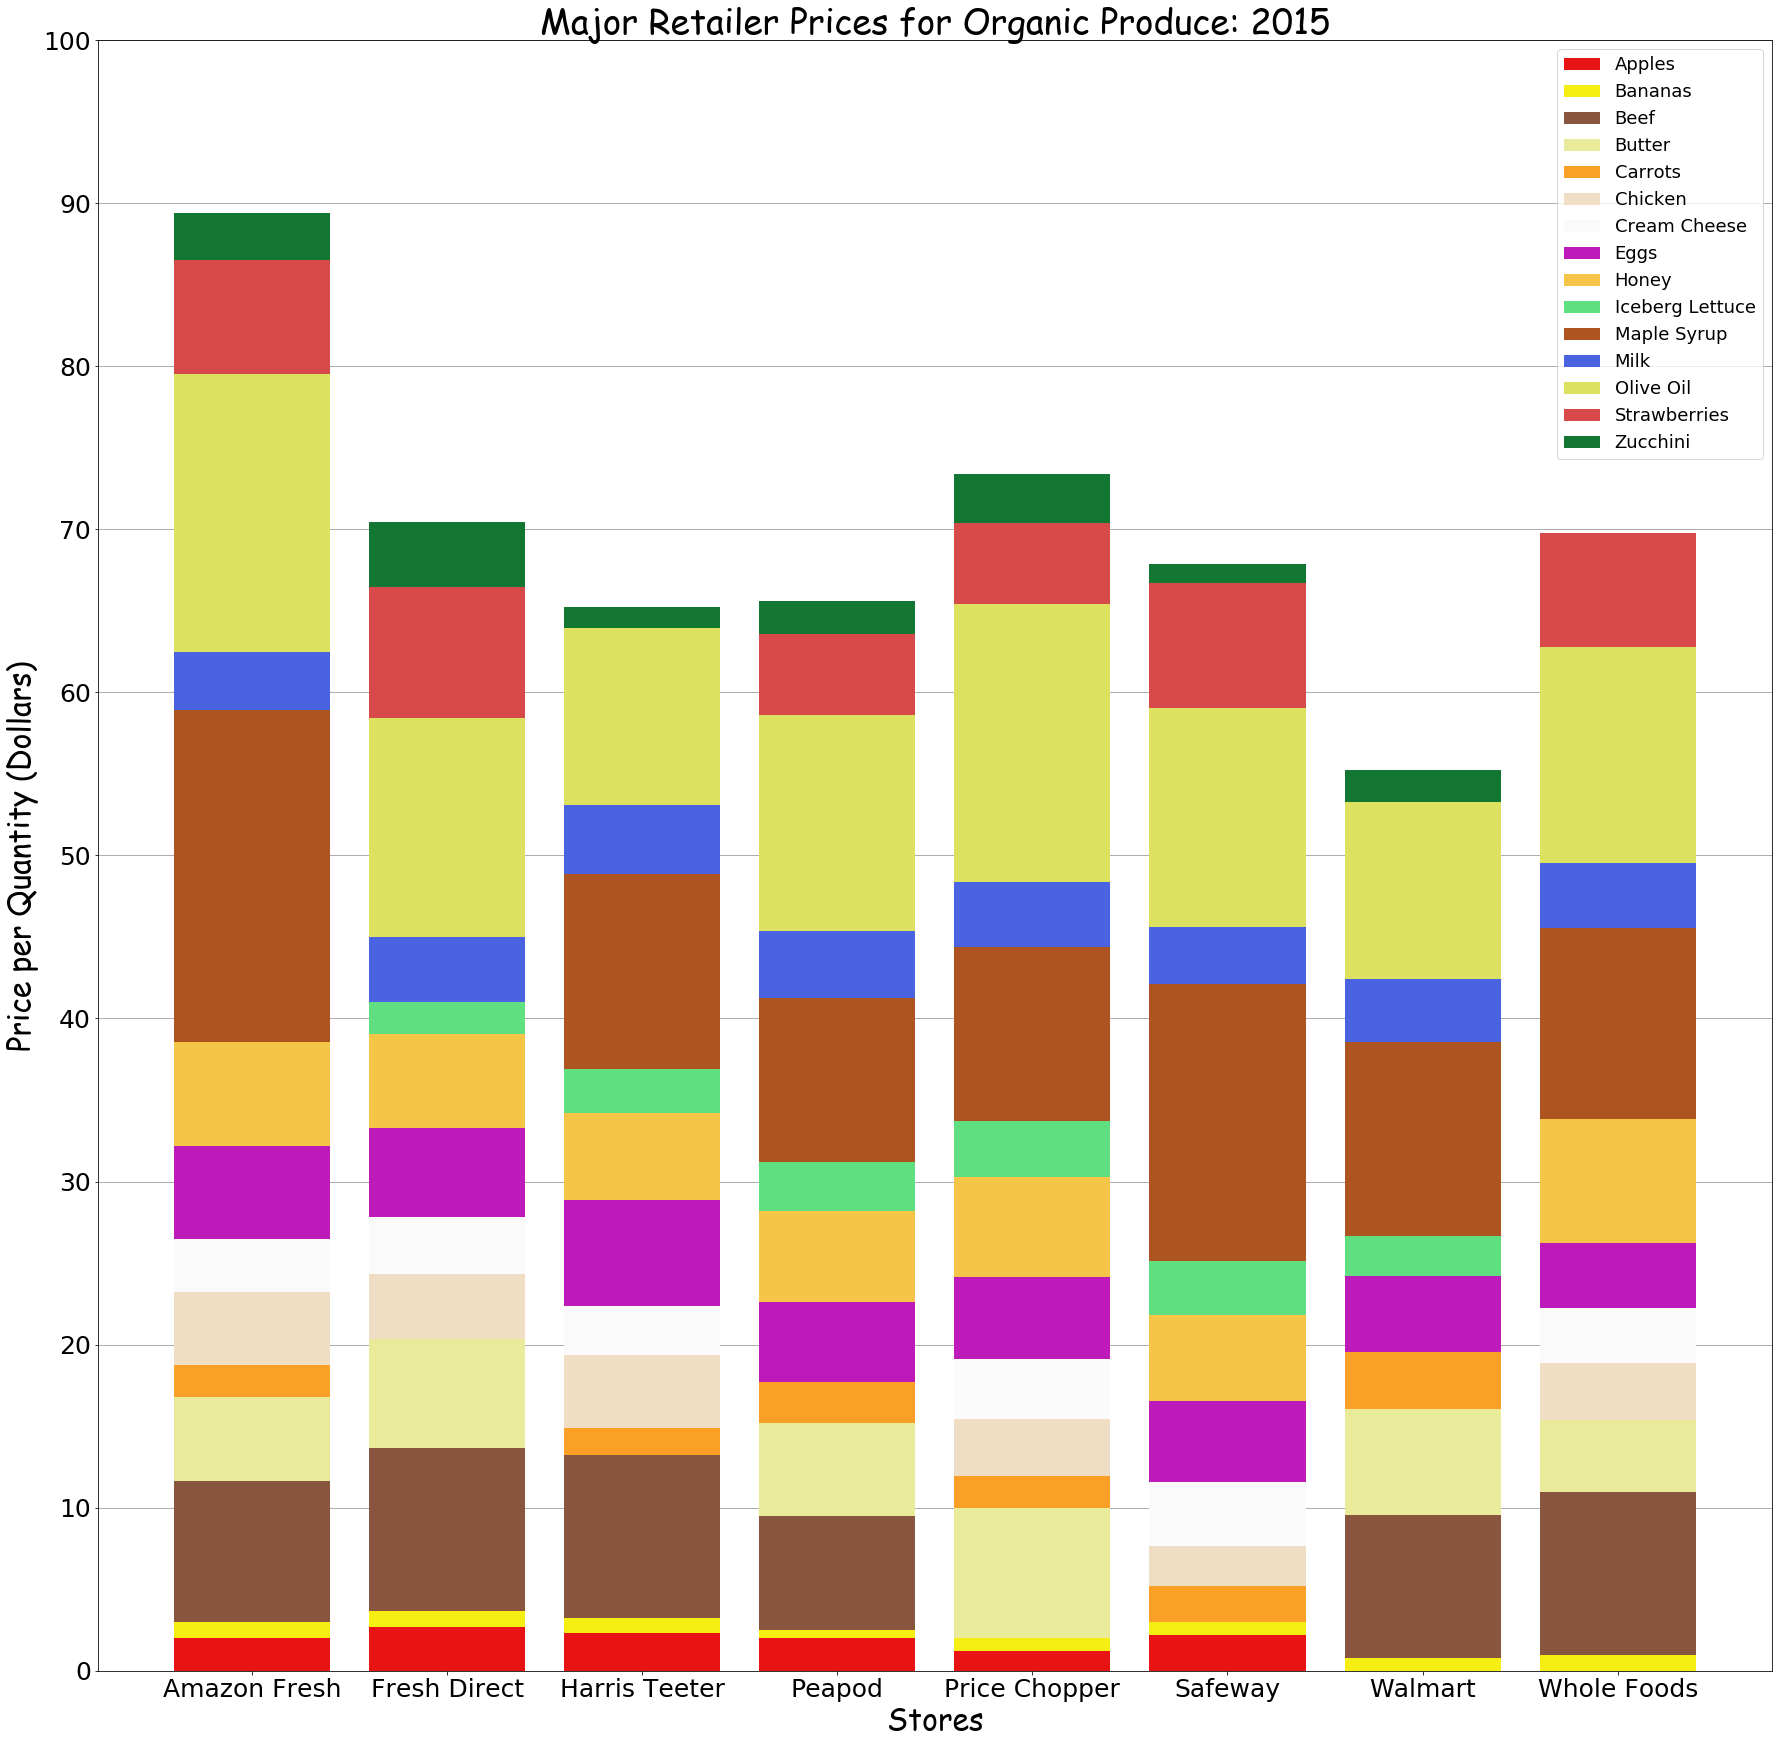

In [399]:
p1 = plt.bar(stores, applesOrgb, color = '#E81313', zorder = 3)
p2 = plt.bar(stores, bananasOrgb, bottom=applesOrgb, color = '#F5EE12', zorder = 3)
p3 = plt.bar(stores, beefOrgb, bottom=[i+j for i,j in zip(applesOrgb, bananasOrgb)], color = '#89553F', zorder = 3)
p4 = plt.bar(stores, butterOrgb, bottom=[i+j+k for i,j,k in zip(applesOrgb, bananasOrgb, beefOrgb)], color = '#EAEA9B', zorder = 3)
p5 = plt.bar(stores, carrotsOrgb, bottom=[i+j+k+l for i,j,k,l in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb)], color = '#FAA027', zorder = 3)
p6 = plt.bar(stores, chickenOrgb, bottom=[i+j+k+l+m for i,j,k,l,m in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb)], color = '#EFDDC4', zorder = 3)
p7 = plt.bar(stores, creamCheeseOrgb, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb)], color = '#FAFAFA', zorder = 3)
p8 = plt.bar(stores, eggsOrgb, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb)], color = '#BE1AB9', zorder = 3)
p9 = plt.bar(stores, honeyOrgb, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb)], color = '#F4C547', zorder = 3)
p10 = plt.bar(stores, icebergLettuceOrgb, bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb)], color = '#5FDF7F', zorder = 3)
p11 = plt.bar(stores, mapleSyrupOrgb, bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb)], color = '#AD5421', zorder = 3)
p12 = plt.bar(stores, milkOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb)], color = '#4963E1', zorder = 3)
p13 = plt.bar(stores, oliveOilOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t for i,j,k,l,m,n,o,p,q,r,s,t in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb)], color = '#DDE160', zorder = 3)
p14 = plt.bar(stores, strawberriesOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u for i,j,k,l,m,n,o,p,q,r,s,t,u in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb, oliveOilOrgb)], color = '#D84949', zorder = 3)
p15 = plt.bar(stores, zucchiniOrgb, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v for i,j,k,l,m,n,o,p,q,r,s,t,u,v in zip(applesOrgb, bananasOrgb, beefOrgb, butterOrgb, carrotsOrgb, chickenOrgb, creamCheeseOrgb, eggsOrgb, honeyOrgb, icebergLettuceOrgb, mapleSyrupOrgb, milkOrgb, oliveOilOrgb, strawberriesOrgb)], color = '#137733', zorder = 3)

# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df1Conv.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
plt.xlabel("Stores", fontname='Comic Sans MS', fontsize=30)
plt.ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(tens, fontsize=25)
plt.grid(axis='y', alpha = 0.4, color = 'black', zorder = 3)
# plt.xaxis.grid(False)
plt.title('Major Retailer Prices for Organic Produce: 2015', fontname='Comic Sans MS', fontsize=35)
plt.legend(produce, loc='best', fontsize=18)
plt.rcParams['figure.figsize'] = [30, 30]

The fifth graph highlights the total major retailer prices across organic and conventional produce in 2015.

Text(0.5, 1.0, 'Total Major Retailer Prices - Conventional v.s. Organic : 2015')

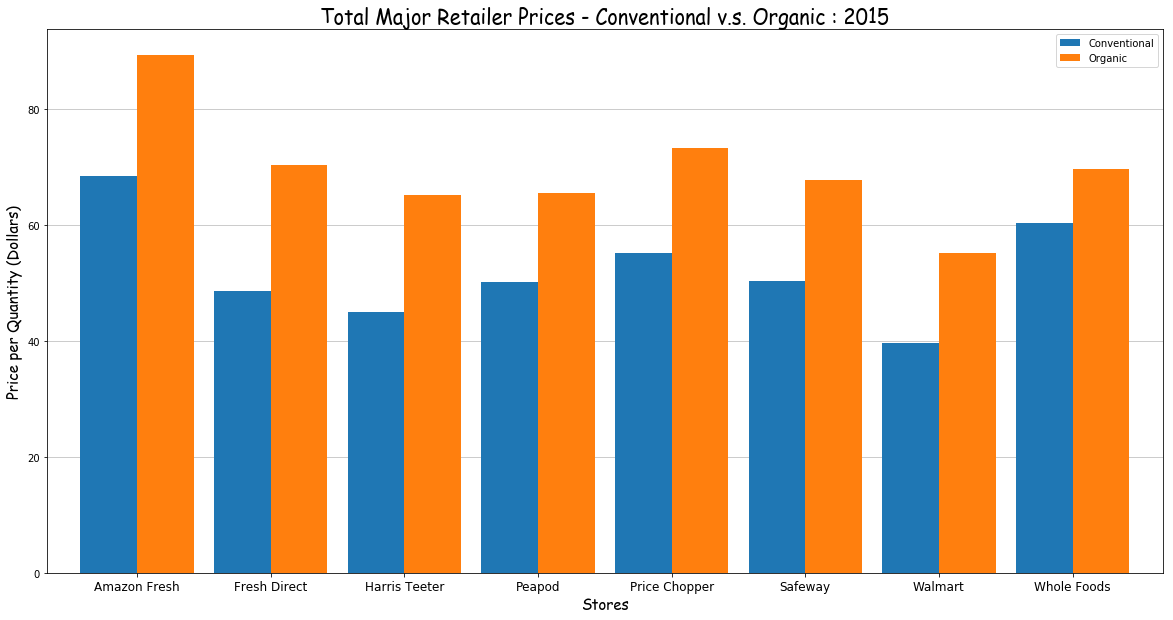

In [289]:
fig, ax = plt.subplots()
dfDiff.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder = 3) 
ax.set_xlabel("Stores", fontname='Comic Sans MS', fontsize=15)
ax.set_ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
ax.grid(alpha = 0.25, color = 'black', zorder = 0)
ax.xaxis.grid(False)
plt.xticks(fontsize = 12, rotation = 0)
plt.xticks(fontsize = 12, rotation = 0)
plt.title('Total Major Retailer Prices - Conventional v.s. Organic : 2015', fontname='Comic Sans MS', fontsize=20)

In [246]:
# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df1Conv.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
# ax.set_xlabel("Produce Items", fontname='Comic Sans MS', fontsize=15)
# ax.set_ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
# ax.grid(alpha = 0.25, color = 'black', zorder = 0)
# ax.xaxis.grid(False)
# plt.title('Major Retailer Prices for Conventional Produce (Part 1): 2015', fontname='Comic Sans MS', fontsize=20)

In [247]:
# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df2Conv.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
# ax.set_xlabel("Produce Items", fontname='Comic Sans MS', fontsize=15)
# ax.set_ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
# ax.grid(alpha = 0.25, color = 'black', zorder = 0)
# ax.xaxis.grid(False)
# plt.title('Major Retailer Prices for Conventional Produce (Part 2): 2015', fontname='Comic Sans MS', fontsize=20)

In [248]:
# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df1Org.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
# ax.set_xlabel("Produce Items", fontname='Comic Sans MS', fontsize=15)
# ax.set_ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
# ax.grid(alpha = 0.25, color = 'black', zorder = 0)
# ax.xaxis.grid(False)
# plt.title('Major Retailer Prices for Conventional Produce (Part 1): 2015', fontname='Comic Sans MS', fontsize=20)

In [249]:
# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df2Org.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
# ax.set_xlabel("Produce Items", fontname='Comic Sans MS', fontsize=15)
# ax.set_ylabel("Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
# ax.grid(alpha = 0.25, color = 'black', zorder = 0)
# ax.xaxis.grid(False)
# plt.title('Major Retailer Prices for Conventional Produce (Part 2): 2015', fontname='Comic Sans MS', fontsize=20)

In [250]:
# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df1Perc.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
# ax.set_xlabel("Produce Items", fontname='Comic Sans MS', fontsize=15)
# ax.set_ylabel("Percent Difference in Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
# ax.grid(alpha = 0.25, color = 'black', zorder = 0)
# ax.xaxis.grid(False)
# plt.title('Difference in Major Retailer Prices for Conventional v.s. Organic Produce (Part 1): 2015', fontname='Comic Sans MS', fontsize=20)

In [251]:
# fig, ax = plt.subplots()
# # df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df2Perc.plot(kind='bar', ax=ax, figsize=(20, 10), width=0.85, zorder=3) 
# ax.set_xlabel("Produce Items", fontname='Comic Sans MS', fontsize=15)
# ax.set_ylabel("Percent Difference in Price per Quantity (Dollars)", fontname='Comic Sans MS', fontsize=15)
# ax.grid(alpha = 0.25, color = 'black', zorder = 0)
# ax.xaxis.grid(False)
# plt.title('Difference in Major Retailer Prices for Conventional v.s. Organic Produce (Part 2): 2015', fontname='Comic Sans MS', fontsize=20)

#### Data Analysis

We now discuss the results of the data to determine which types of organic food cost more or less than conventional food, while also looking at how much more organic produce is in comparison to conventional produce at certain retail stores.

Taking a look at graph 1, 

- Identify the largest and smallest
- Identify the difference between the largest and smallest\
- Milk cost the same (and others)? Olive oil is vastly different!
- For each type of produce, say where to buy it!

Moving on to graph number 2,

- Identify the largest and smallest
- Identify the difference between the largest and smallest
- Most cost the same, but maple syrup is different!
- For each type of produce, say where to buy it

Finishing off with graph number 3,

- Organic is definitely more (per store difference)
- Smallest and largest difference between reg and org (at two stores) 
- Conclude which stores to shop at
- Conclude whether the price is worth it (incorporate other factors)

### 6.2 - Average Conventional and Organic Fruit and Vegetable Prices over time  

#### Data Wrangling

#### Data Visualization

#### Data Analysis

# SUSTAINABLITY

### https://www.sciencedirect.com/science/article/pii/S0301479712004264

3.3. Land use
Median response ratio showed that organic farming requires 84% more land compared to conventional farming in Europe (Figs. 1C and 4A). This is mainly due to lower crop yields, lower yielding animals and land area requirement for fertility building crops. The average organic yields over all crops in the data were 75% (SD ± 17%) of conventional yields (Table 2). In only in two cases were the organic yields higher, both of which related to melon production (Melero et al., 2006). The main reason for lower organic yields identified in the studies was insufficient availability of nutrients (especially nitrogen) although some studies mentioned problems with weeds, diseases or pests (Korsaeth, 2008). The higher organic melon yields were explained by higher SOM content in the organic fields compared to the conventional fields (Melero et al., 2006). The studies that found similar yield levels from both systems compared yields in experimental farms that had high soil quality (Herencia et al., 2008; Melero et al., 2006).

In [ ]:
#Scrape table 2 (id = tbl2) and plot the results. Not too much data wrangling here

3.7. Biodiversity
A meta-analysis that compared biodiversity in organic and conventional farms (Bengtsson et al., 2005), found organic farms generally to have 30% higher species richness and 50% higher abundance of organisms than conventional farms. However, it also showed a wide variation between different studies. Sixteen per cent of the studies found a negative effect of organic farming on species richness. The differences were more prominent at the plot scale than in matched landscapes. They also found that the effect of organic farming on species richness was larger in intensively managed landscapes than in diverse landscapes with many non-crop biotopes.

In a review of literature published between 1981 and 2003, Hole et al. (2005) compared biodiversity in organic and conventional farms. They found that organic farming generally had positive impacts on many species (Table 3). However, they concluded that it is still unclear whether conventional farming with specific practices for biodiversity conservation (i.e. agri-environmental schemes) can provide higher benefits than organic farming.

BUT:
More studies published after 2003 supported the findings of Hole et al. (2005) and Bengtsson et al. (2005) (Table 3), but none found organic farming to have negative impacts on biodiversity. In particular, weed plant richness has been widely found to be greater in organic farms compared with conventional farms (Albrecht, 2005; Gabriel et al., 2006; Petersen et al., 2006a; Romero et al., 2008; Roschewitz et al., 2005). Some studies showed that landscape had more significant impact on biodiversity than farming regime (Kragten and Snoo, 2007; Piha et al., 2007; Purtauf et al., 2005; Rundlöf et al., 2008; Rundlöf and Smith, 2006). It has also been found that organic farming alone without additional practices is not adequate for conserving some bird species (Kragten and Snoo, 2007; Piha et al., 2007) nor butterflies (Ekroos et al., 2008). The question as to whether conventional farming with specific targeted practices can result in higher biodiversity than organic farming is yet to be fully answered.

In [ ]:
#Scrape table 3 (id = tbl3) and plot the results. Not too much data wrangling again

4.1. Comparison with a previous study
The results of this study are largely consistent with the findings of Mondelaers et al. (2009) (Table 4), although they also included non-European studies. The largest difference was in the results of nitrogen leaching per kg of product, where our study showed 49% higher impacts from organic farming whereas Mondelaers et al. showed 5% lower impacts from organic system. This difference can be explained by the fact that our study included different studies from those included by Mondelaers et al., as non-European studies were excluded and more European studies were included in our study. We included 37 papers that they did not consider, partly reflecting the fact that they did not include some impact categories that were included in this study: ammonia emissions, phosphorus losses, acidification potential, eutrophication potential and energy use. It would be valuable in further work to explore whether there are systematic differences in the definitions and relationships considered between different regions of the world or between different categorisations of organic farming.

In [ ]:
#Scrape table 3 (id = tbl4) and plot the results. Not too much data wrangling again

### https://geneticliteracyproject.org/2018/02/16/usda-data-confirm-organic-yields-dramatically-lower-conventional-farming/

In [ ]:
#I'm having trouble finding the data they say they have used, so I don't see any data wrangling here so far.

# New to the link above this: https://www.nass.usda.gov/Surveys/Guide_to_NASS_Surveys/Organic_Production/index.php
The TA suggested to do a comparison of organic evolution over the years

### https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0161673

In [ ]:
#from s1, tables "Data summarized by crop" and "Data sorted by crop and location"
#https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0161673.s013&type=supplementary
#Once again, probably not too much wrangling here

### https://rodaleinstitute.org/wp-content/uploads/fst-30-year-report.pdf

In [ ]:
#Probably useful for facts helping data analysis and conclusions

### https://www.sciencedirect.com/science/article/pii/S0006320718313636 

In [ ]:
#I have not seen any data relevant to the questions/project. I have read that agricultures and the use of
#pesticides are causes for the lost of insect speciess

## 8. Does organic food taste any better than conventional food?

In [ ]:
# TO-DO